# Car Insurance Risk Project 🚘

The idea of this project is to predict the insurance risk rating of a car as well as characterizing the 
different segments of the population.  

### 1. EDA
To begin with the project, we'll perform data cleaning and exploratory data analysis (EDA) on the provided dataset. This will include checking for data quality issues, visualizing the data, and extracting insights from it.

### 1.1 Data Quality

In this section, the focus will be on assessing the integrity of the data, ensuring that it is clean and consistent for analysis. 
Steps will include:

- Identifying Missing Data: We will search for any missing or incomplete data points and handle them appropriately (e.g., replacing them with median values or removing affected rows).
- Checking for Duplicates: Any duplicated rows will be identified and removed to prevent bias in the analysis.
- Data Type Correction: Ensuring that each column has the appropriate data type, converting strings to numbers where necessary.
- Outliers: We will identify and handle outliers that could skew the analysis using visualization techniques such as box plots.

1.1.1 Importing Libraries and Loading the Data

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

1.1.2 Data Collection and information

In [302]:
def import_data(file_path, columns):
    """
    Function with the responsibility to import the data from the file.
    """
    try:
        data = pd.read_csv(file_path, names=columns)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Constants
file_path = '../data/imports-85.csv'
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Import the data
df = import_data(file_path, columns)

# Showing or Checking results
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [303]:
def dfInformation(dataframe):
    """
    Gets the initial information of the Dataset, the number of records, number of variables, non-null objects and data type.

    Args:
        dataframe (DataFrame): Source dataset.
    
    Returns:
        void: A range indes conforma by float64(2), int64(1), object(6)

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe.info()
dfInformation(df)
# Getting the shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

(205, 26)

In [304]:
# Getting all the unique values in the make column
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [305]:
# Getting duplicate rows
duplicated = df[df.duplicated()]
print(f"There are {len(duplicated)} duplicated values in dataframe")

There are 0 duplicated values in dataframe


1.1.3 Identifying Missing Data

In [306]:
def check(dataframe):
    """
    Gets the amount of null data and unique is calculated

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe tha represents de amortized values of null and unique values for each column.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check 
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,object,52,0
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,3,0
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


In [307]:
def checkDuplicates(dataframe):
    """
    Checks duplicated values for each column and amortized this count.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        int: The total of duplicated values in an specifica dataframe

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    return dataframe.duplicated().sum()
checkDuplicates(df)

np.int64(0)

All looks like there are no missing values in the dataset. However, we can see that some columns have special characters that need to be removed.

In [308]:
def removeSymbols(dataframe):
    """
    Removes the symbols from the dataset.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe without the symbols.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe = dataframe.replace('?', np.nan)
    return dataframe

# Removing the symbols
df = removeSymbols(df)

In [309]:
# Categorical columns
categorical_columns = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                        'engine-type', 'num-of-cylinders', 'fuel-system']

# Numerical columns
numerical_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                        'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# All numerical columns pass to float or int
df[numerical_columns] = df[numerical_columns].astype(float)

In [310]:
# Rechecking the data
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


### 2. Data Visualization
Visualizations will help uncover relationships between car characteristics and insurance risk. The focus here includes:

- Distribution of Features: Visualizing the distribution of important car attributes (e.g., engine size, body style) using histograms and bar charts to understand their spread across the dataset.
- Correlations: Create a heatmap to identify how different features (e.g., engine size, fuel type, and price) are correlated with each other and with the insurance risk rating.
- Feature-Target Visualization: Use box plots and scatter plots to visually analyze how each feature relates to the car's risk rating, helping to identify patterns.

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

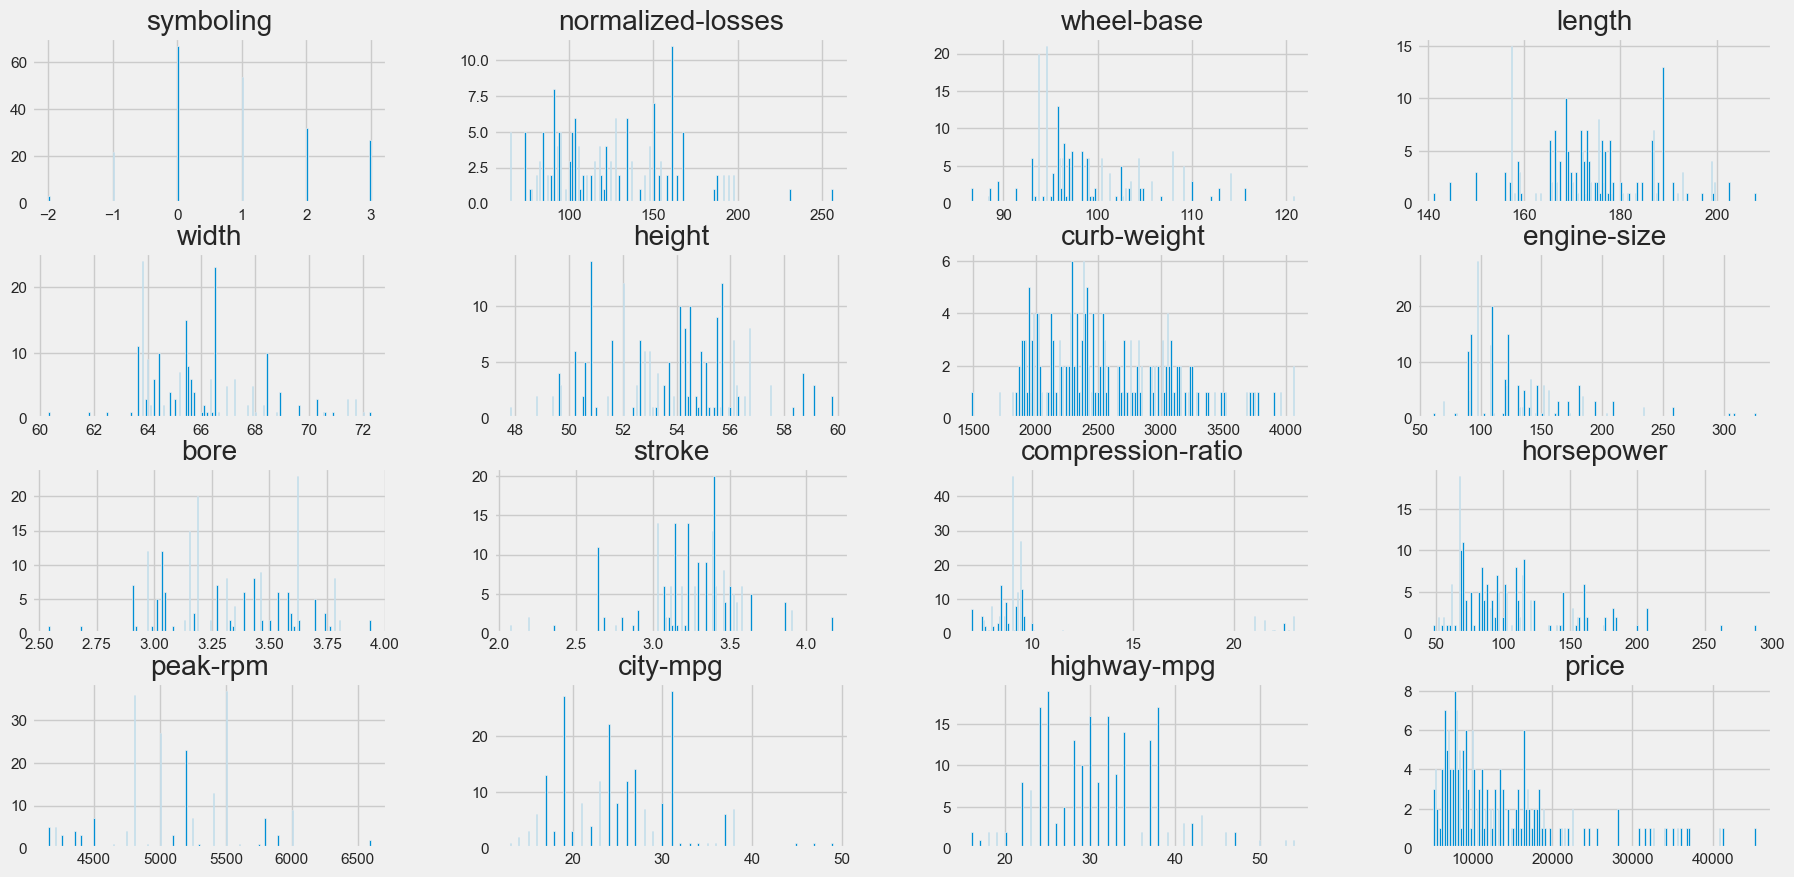

In [311]:
# Dataframe histogram
df.hist(bins=200,figsize=[20,10])

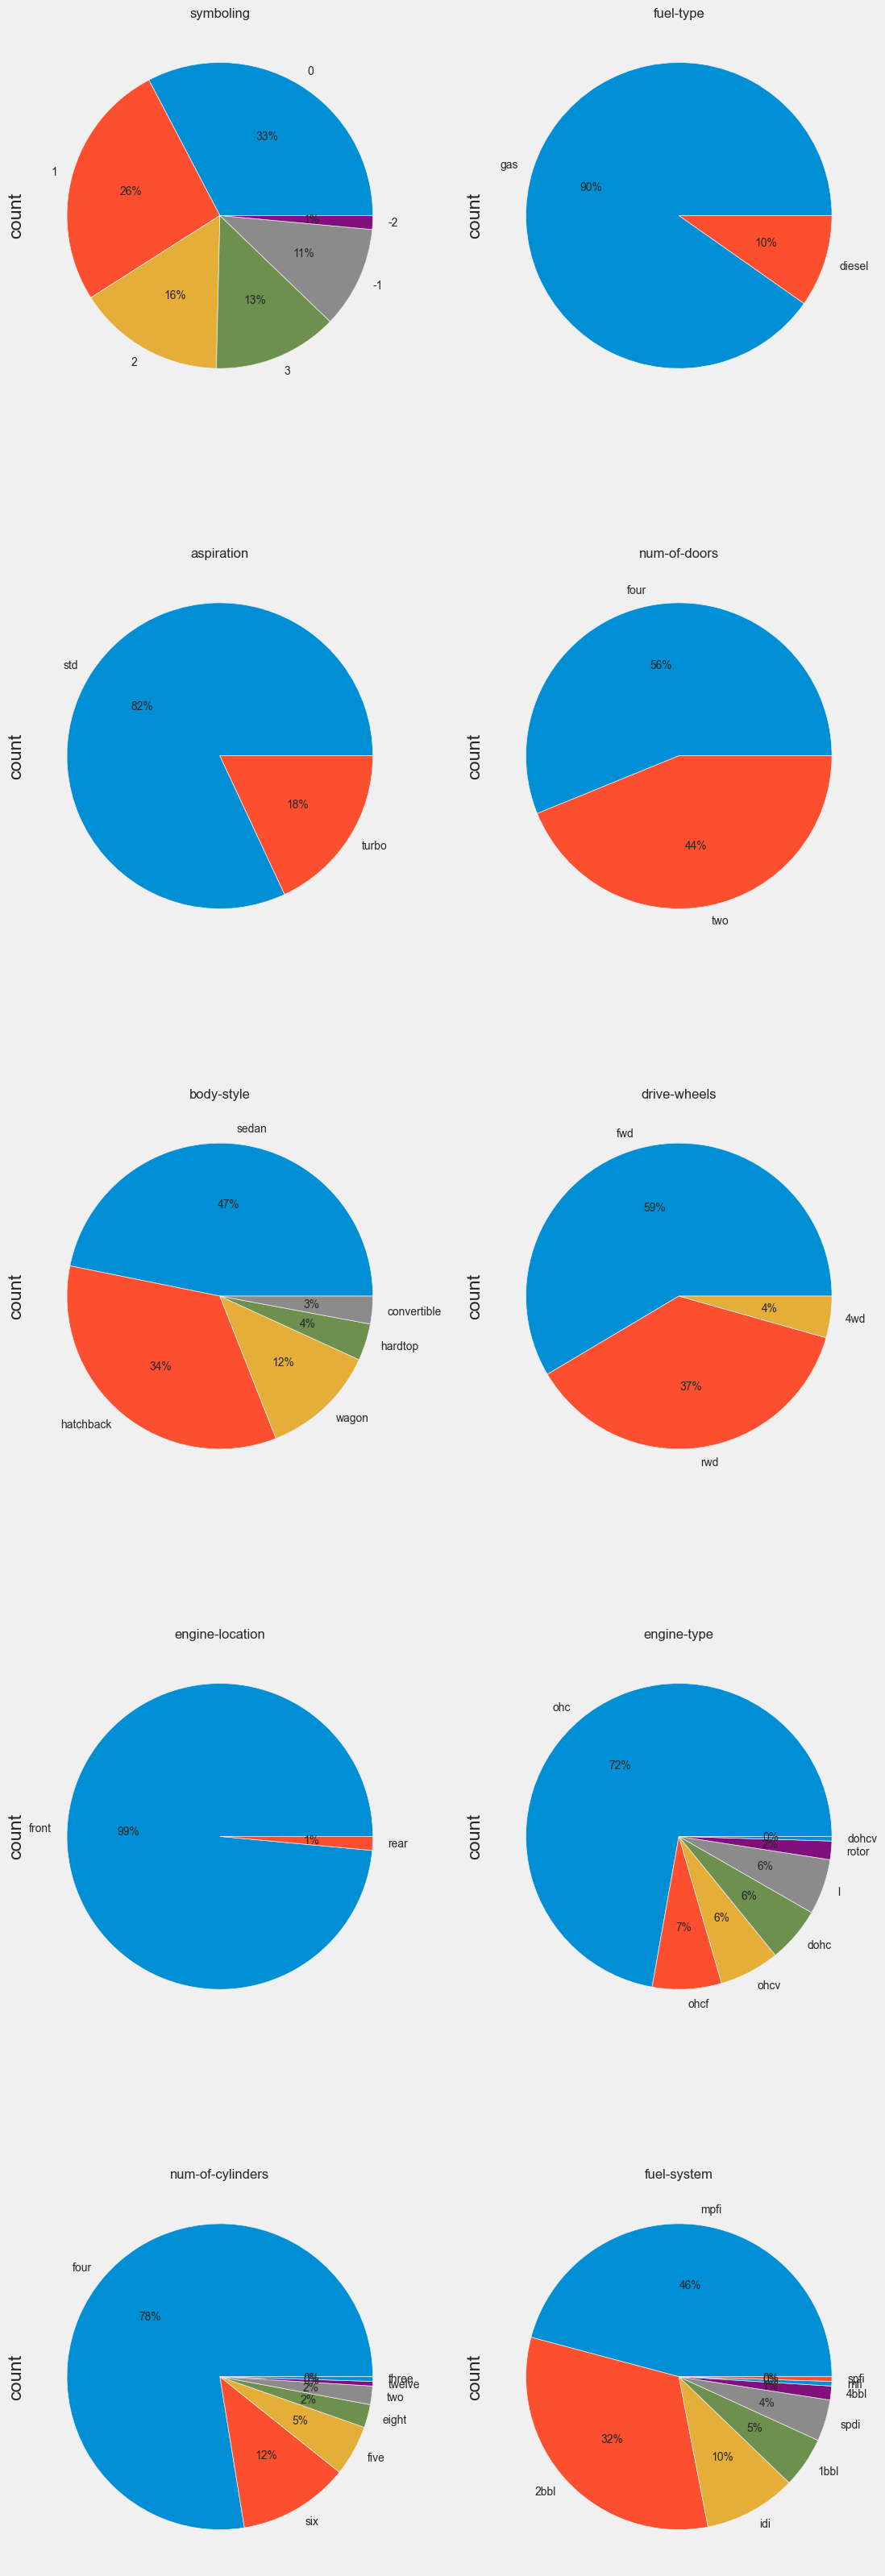

In [312]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(12, 40), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

# Columns list
cols_list = ['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
# Pie plot
pie_plot(df, cols_list, 5, 2)

Text(0, 0.5, 'Count of Cars')

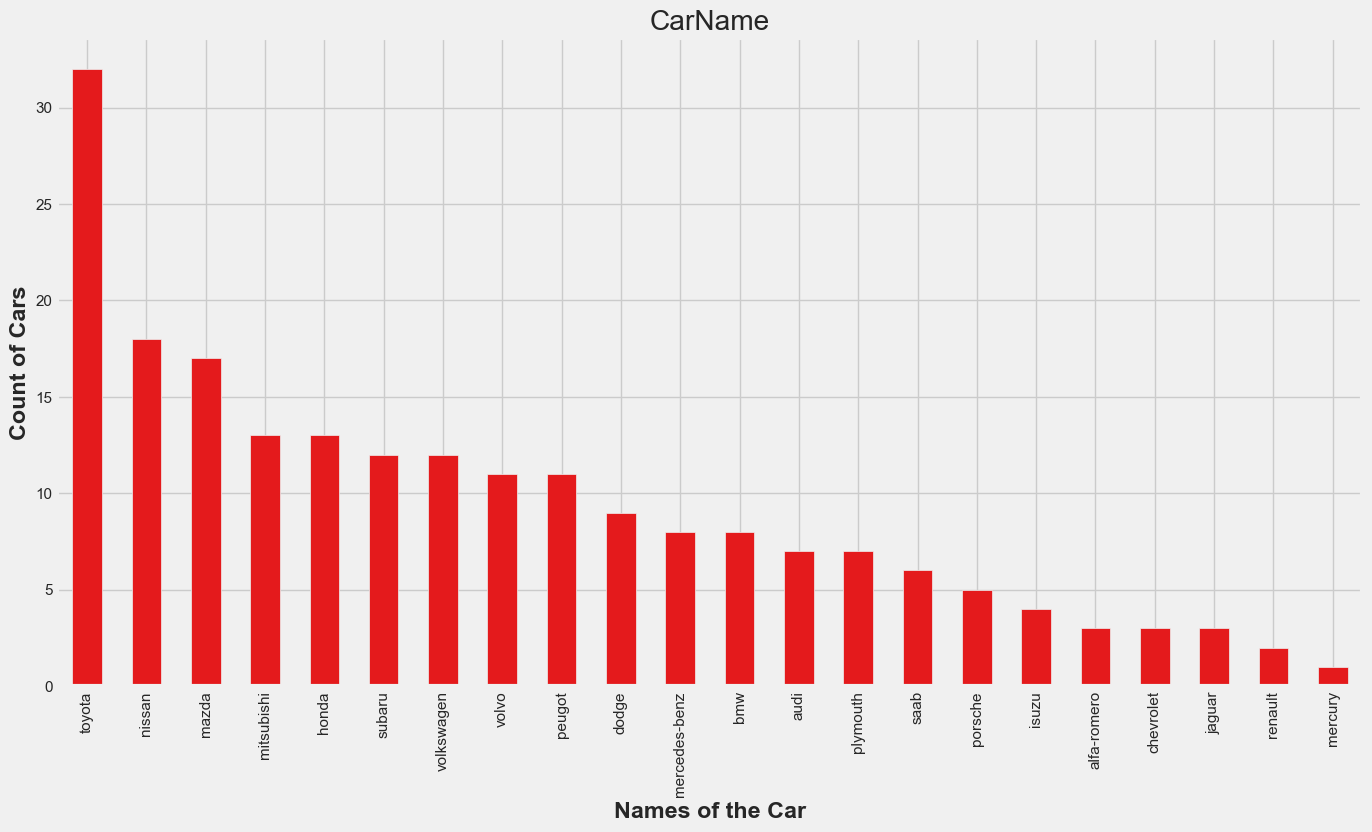

In [313]:
# Visualizing the different makes available

plt.rcParams['figure.figsize'] = [15,8]
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

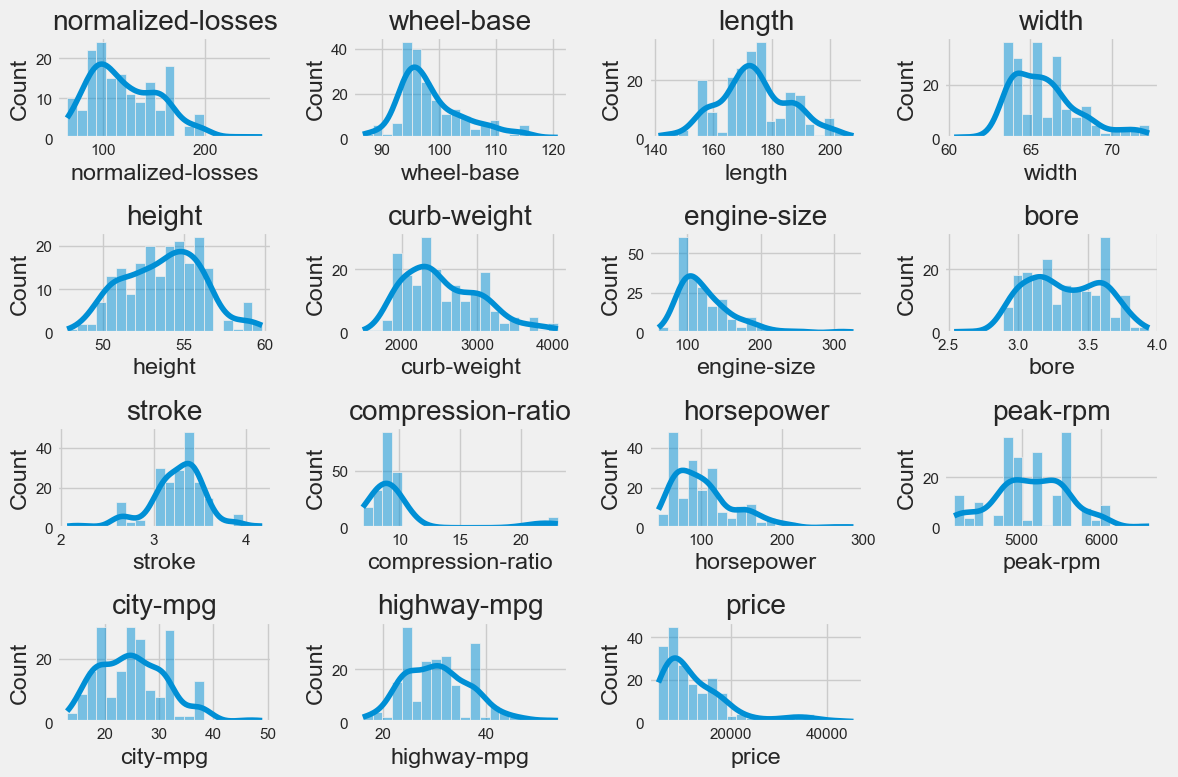

In [314]:
# Visualizing the numerical columns
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(4, 4, numerical_columns.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

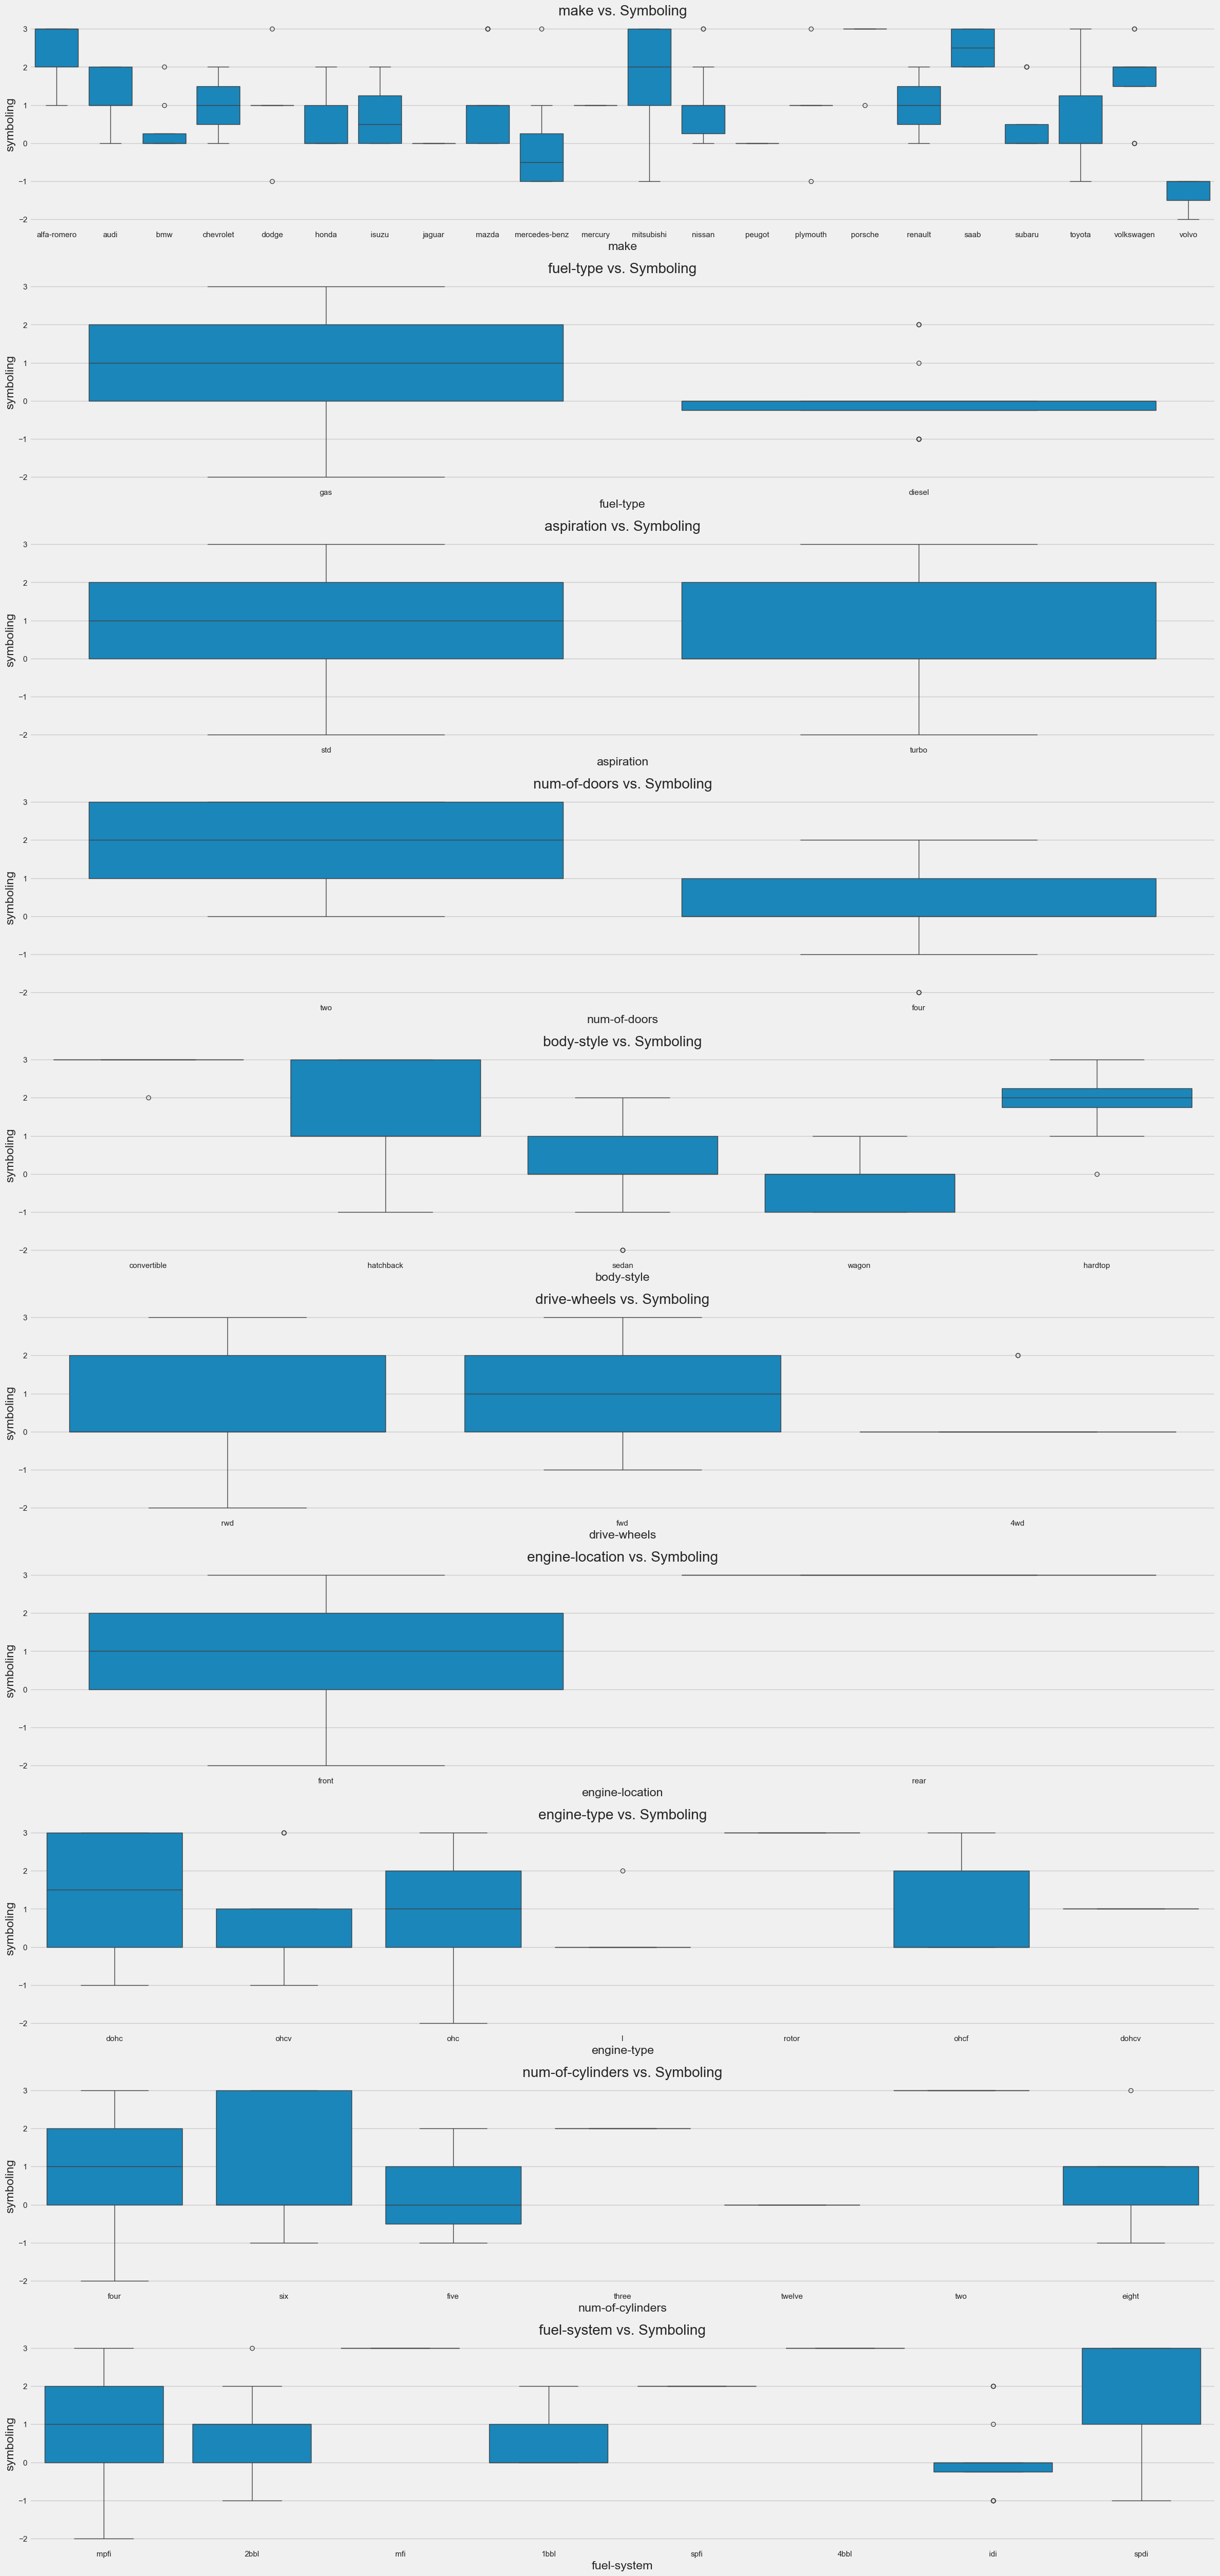

In [315]:
# Categorical Feature vs. symboling
plt.figure(figsize=(24, 60))
slice = categorical_columns[1:]
for feature in slice:
    plt.subplot(12, 1, slice.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='symboling')
    plt.title(f'{feature} vs. Symboling')
plt.tight_layout()
plt.show()

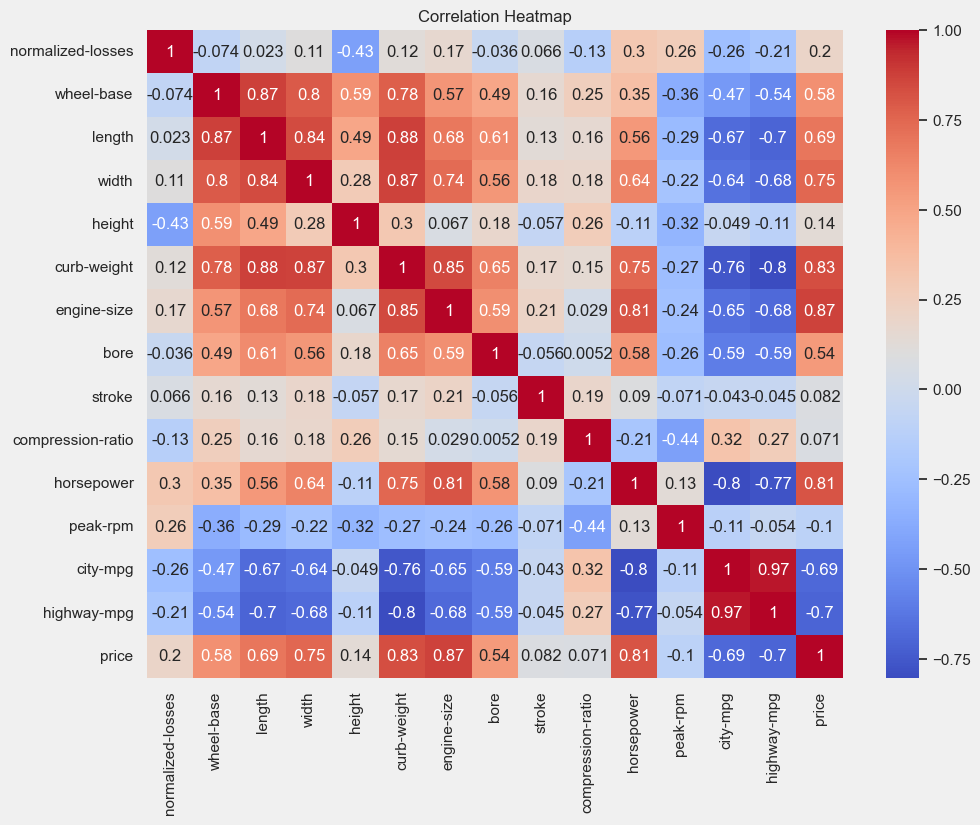

In [316]:
# Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
# Adjust font size
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 3. Extraction of Insights
This section focuses on extracting actionable insights to inform risk prediction and characterize segments. Steps include:

#### Summary Statistics

##### Car Variety:
* Dataset covers 205 car models, each unique in attributes.
* Sizes, weights, and engine capacities vary across cars.

##### Engine type:

* Engines differ in bore diameter (boreratio) and stroke length (stroke).
* Risk ratings (symboling) vary from -3 to 3. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe

##### Price Range:
* Minimum Price: $5,118 dollars
* Maximum Price: $45,400 dollars
* Average car price is about: $13,276 dollars. The relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

##### Data distribution:
* Features like carwidth, curbweight, enginesize show notable variability.
* Potential outliers present in compressionratio and horsepower.


#### Feature Importance for Risk Prediction:
* CarName: Make and model of car
* Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)
* Doornumber: Number of car doors (two or four)
* Enginelocation: Location of car engine (front of rear)
* Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)
* Fueltype: Car Fuel Type (gas or diesel)
* Price: total price of car in dollars
* Stroke: Car strokes (numerical value in strokes)
* Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)


Insights
- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- HigerEnd cars seems to have rwd drivewheel

### 4. Understanding and Cleaning of Data

In this section, we focus on understanding the structure and content of the dataset, identifying any inconsistencies or missing values, and applying appropriate cleaning techniques to prepare the data for analysis. This involves:

- Data Exploration: Investigate the dataset's structure, including the number of rows and columns, data types, and unique values in each column.
- Data Cleaning: Address any data quality issues, such as missing values, duplicates, or incorrect data types, to ensure the dataset is clean and consistent.
- Feature Engineering: Create new features or transform existing ones to better represent the underlying data and improve predictive performance.
- Data Transformation: Normalize or scale the data as needed to ensure all features are on a similar scale for modeling.


#### 4.1 Identifying categorical and numerical columns

In [317]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)
print(f"There are {len(numerical)} numerical columns:")
print(numerical)
print(f"There are {len(categorical)} categorical columns:")
print(categorical)

There are 16 numerical columns:
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
There are 10 categorical columns:
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [318]:
def check(dataframe):
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,float64,51,41
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,2,2
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


#### 4.2 Data Cleaning due to special characters removed in previous steps

In [319]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<Axes: >

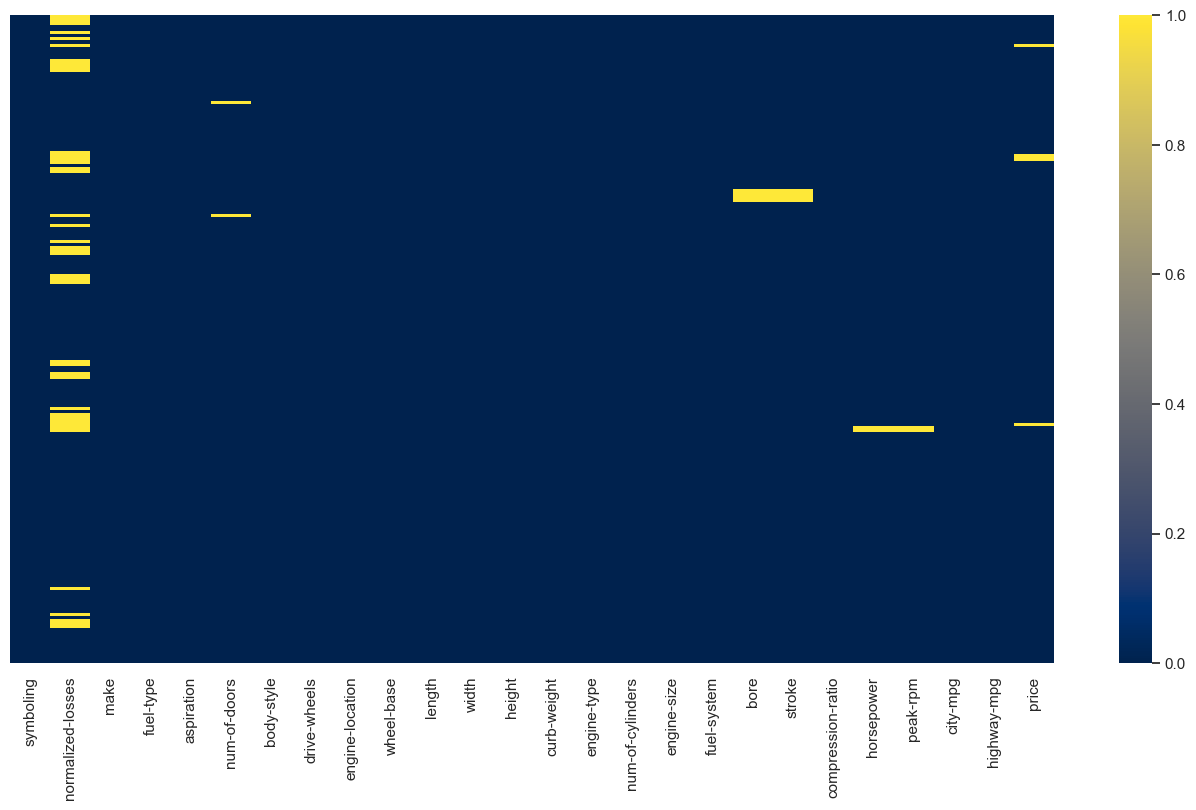

In [320]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='cividis')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12012\990051494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='normalized_losses_na', data=null_count_by_make, palette='viridis')


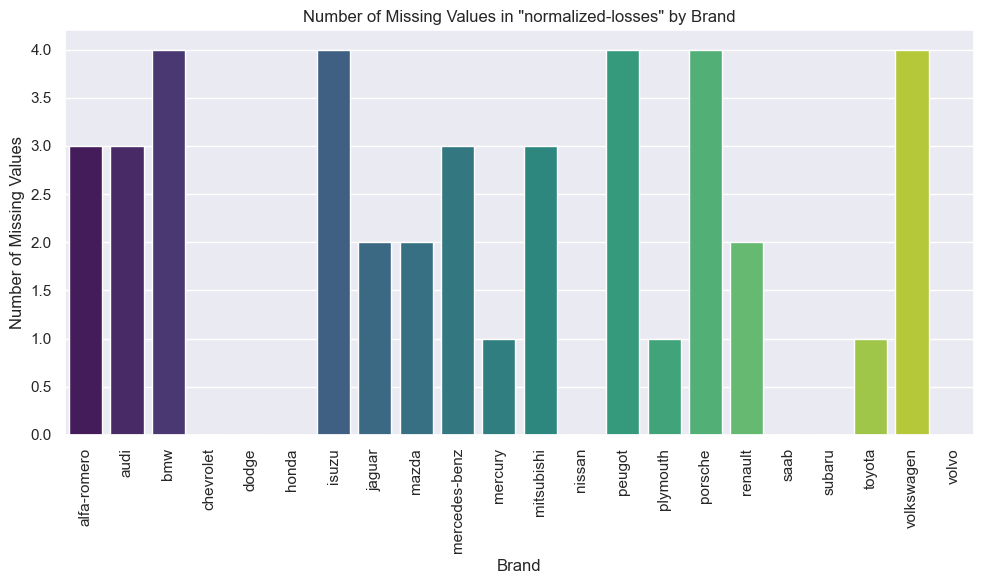

In [321]:
df['normalized_losses_na'] = df['normalized-losses'].isna().astype(int)

# Count how many missing values each brand has in 'make'
null_count_by_make = df.groupby('make')['normalized_losses_na'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='normalized_losses_na', data=null_count_by_make, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Missing Values in "normalized-losses" by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Missing Values')

# Display the plot
plt.tight_layout()
plt.show()

#### 4.3 Detecting and Handling Outliers

In [322]:
def detect_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # If there are outliers, print how many and which ones
    if not outliers.empty:
        print(f"\nOutliers in the column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(outliers[['symboling', column]])  # Only show the column with outliers and the identifier
    else:
        print(f"No outliers found in the column '{column}'")

# List of numeric columns
numerical_columns = ['symboling', 'wheel-base', 'length', 'width', 'height',
                     'curb-weight', 'engine-size', 'compression-ratio',
                     'city-mpg', 'highway-mpg']

# Iterate over the numeric columns to detect outliers
for column in numerical_columns:
    detect_outliers(df, column)

No outliers found in the column 'symboling'

Outliers in the column 'wheel-base':
Number of outliers: 3
    symboling  wheel-base
70         -1       115.6
71         -1       115.6
73          0       120.9

Outliers in the column 'length':
Number of outliers: 1
    symboling  length
18          2   141.1

Outliers in the column 'width':
Number of outliers: 8
     symboling  width
6            1   71.4
7            1   71.4
8            1   71.4
70          -1   71.7
71          -1   71.7
73           0   71.7
74           1   72.0
129          1   72.3
No outliers found in the column 'height'
No outliers found in the column 'curb-weight'

Outliers in the column 'engine-size':
Number of outliers: 10
    symboling  engine-size
15          0        209.0
16          0        209.0
17          0        209.0
47          0        258.0
48          0        258.0
49          0        326.0
71         -1        234.0
72          3        234.0
73          0        308.0
74          1       

#### 4.4 Removing Outliers

In [323]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Iterate over the numeric columns to remove the outliers
for column in numerical_columns:
    df_cleaned = remove_outliers(df_cleaned, column)

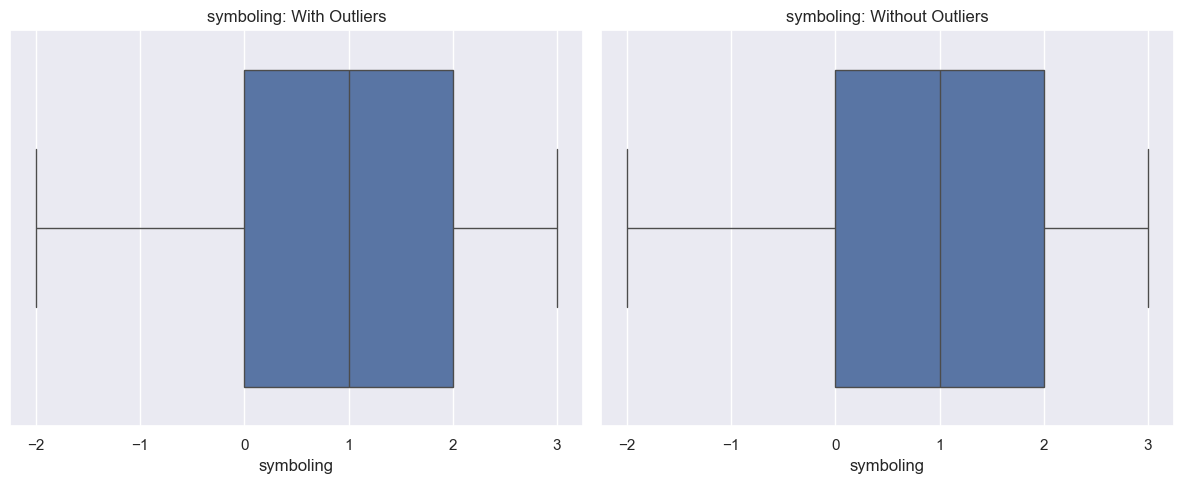

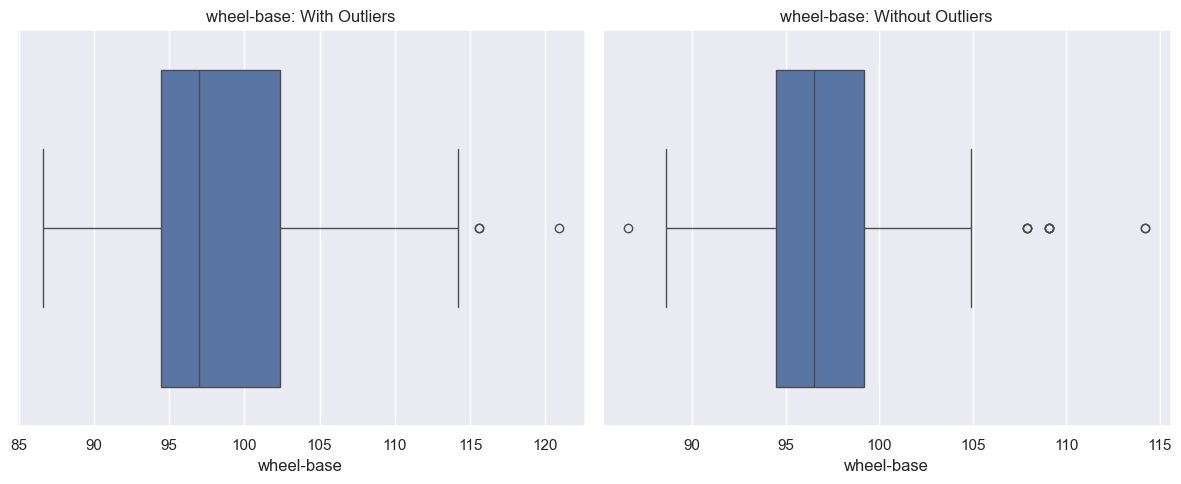

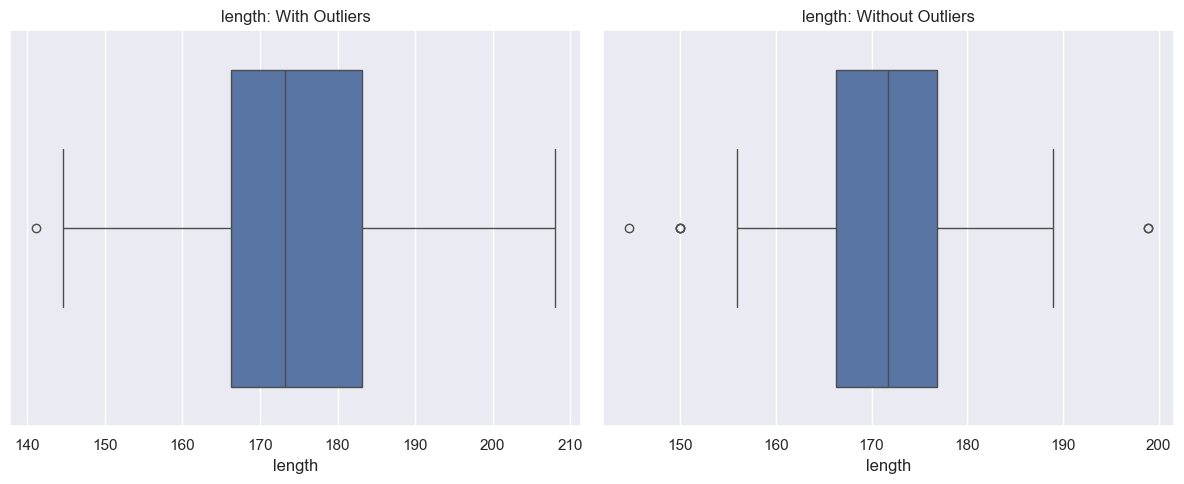

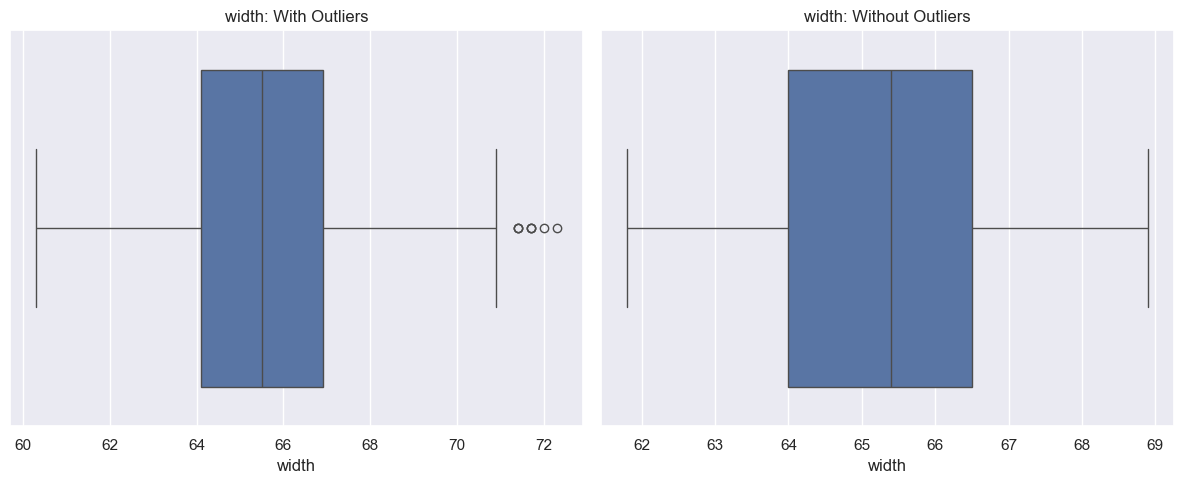

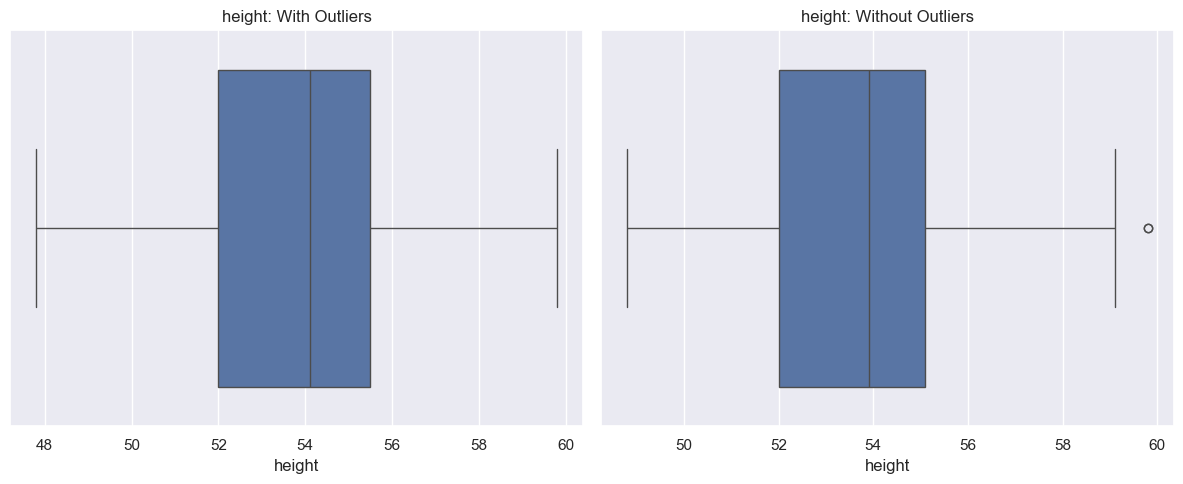

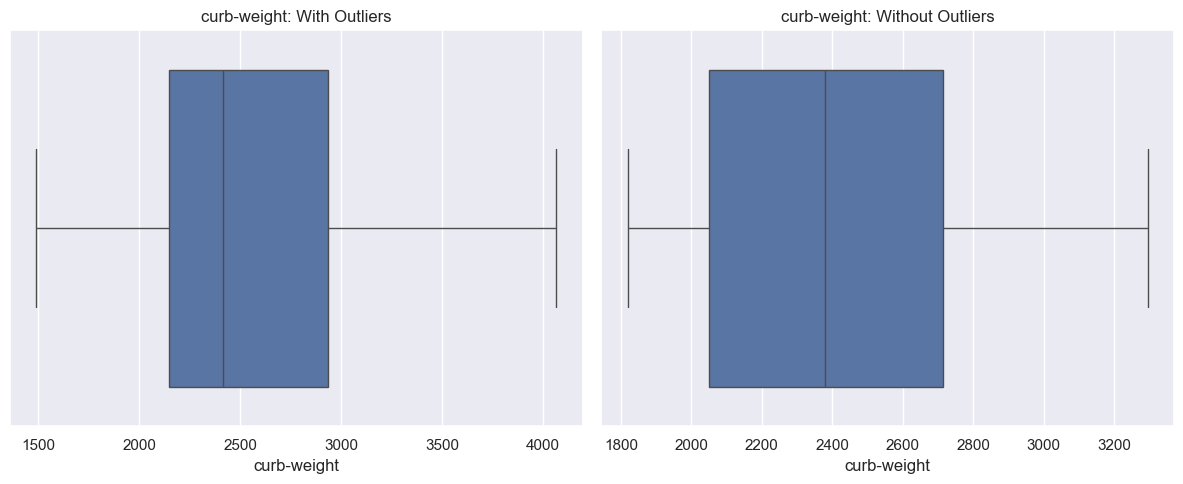

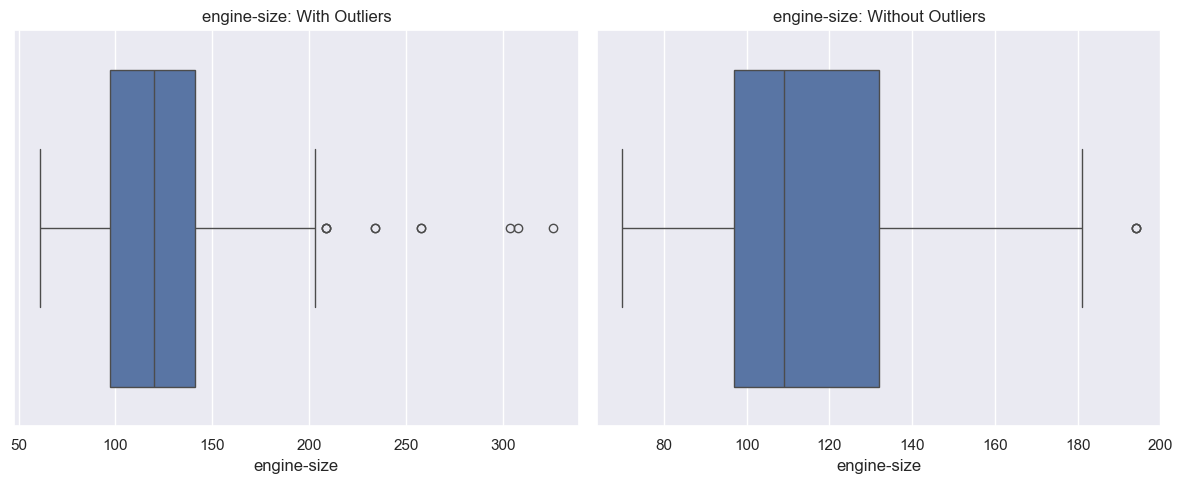

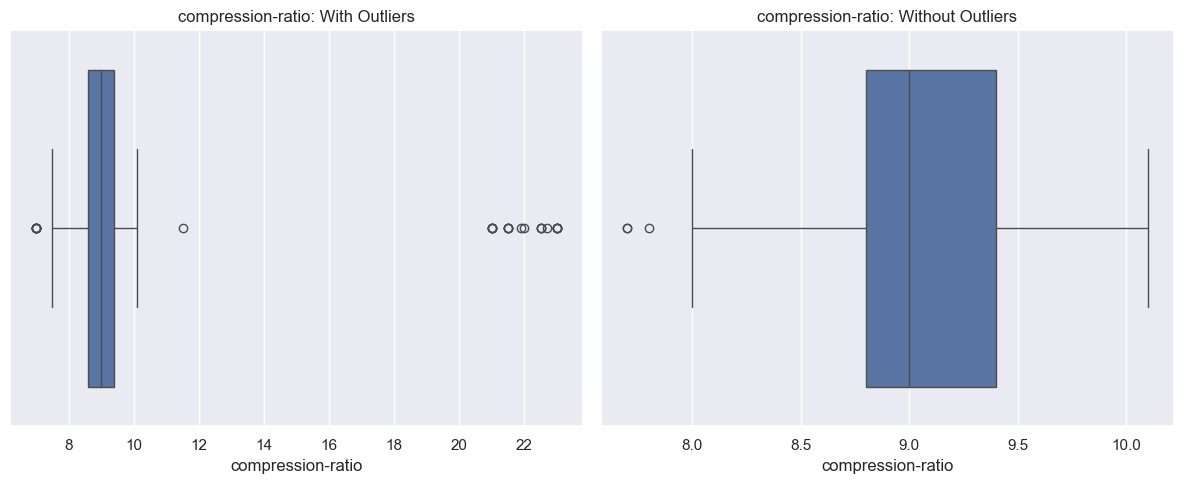

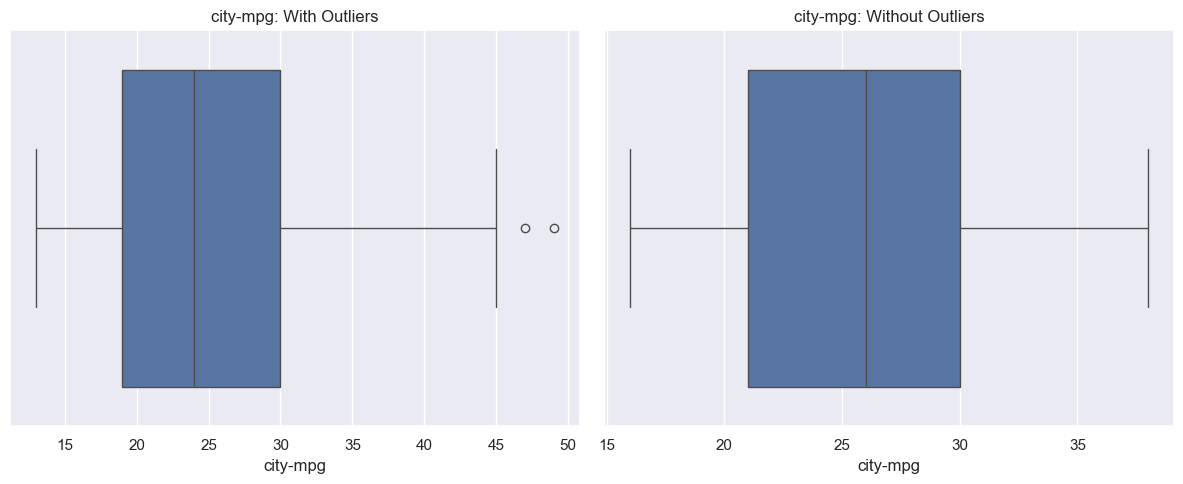

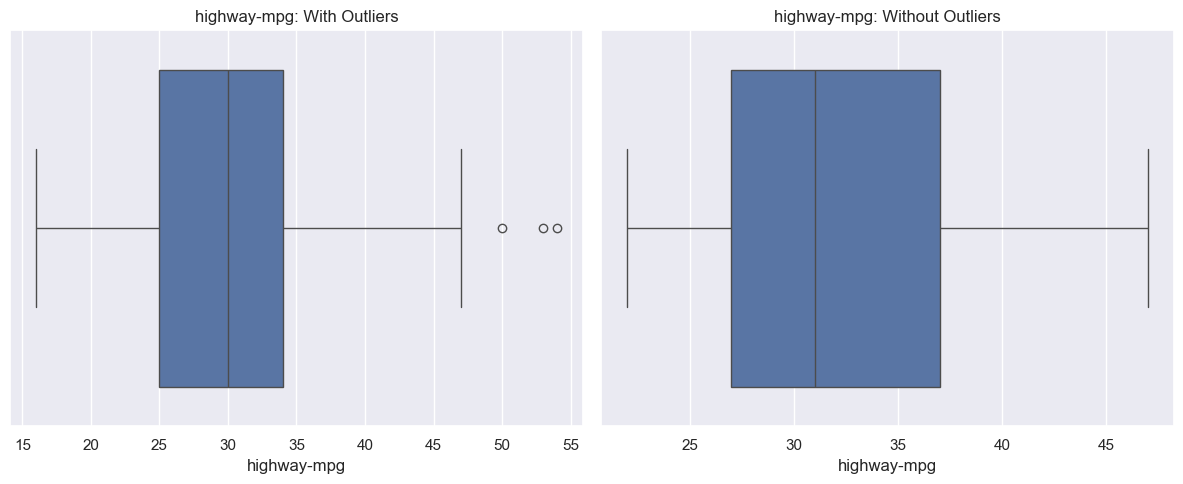

In [324]:
def plot_before_after_outliers(df_original,df_cleaned, column):
    plt.figure(figsize=(12, 5))

    # Plot with outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_original[column])
    plt.title(f'{column}: With Outliers')

    # Plot without outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'{column}: Without Outliers')

    plt.tight_layout()
    plt.show()

# Plot comparisons for each numeric column
for column in numerical_columns:
    plot_before_after_outliers(df,df_cleaned, column)

## KNN

El algoritmo KNN es un método supervisado que predice la clase o valor de un nuevo dato buscando los k puntos más cercanos en el conjunto de datos. En clasificación, asigna la clase más frecuente; en regresión, calcula el promedio.

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from tabulate import tabulate

Debido a que el algoritmo KNN se miden distancias, sólo se tienen en cuenta las variables numéricas en el conjunto de las variable independientes. Symboling es la variable objetivo

In [326]:
dependent = df['symboling']
num = df.select_dtypes(include=['int64', 'float64'])

Normalización de las variables independientes:

In [327]:
# Normalizar las variables numéricas
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled, columns=num.columns)

#Visualizamos
print("Variables numéricas normalizadas:")
print(num_scaled.head())

Variables numéricas normalizadas:
   symboling  normalized-losses  wheel-base    length     width    height  \
0   1.743470                NaN   -1.690772 -0.426521 -0.844782 -2.020417   
1   1.743470                NaN   -1.690772 -0.426521 -0.844782 -2.020417   
2   0.133509                NaN   -0.708596 -0.231513 -0.190566 -0.543527   
3   0.938490           1.188659    0.173698  0.207256  0.136542  0.235942   
4   0.938490           1.188659    0.107110  0.207256  0.230001  0.235942   

   curb-weight  engine-size      bore    stroke  compression-ratio  \
0    -0.014566     0.074449  0.514000 -1.821370          -0.288349   
1    -0.014566     0.074449  0.514000 -1.821370          -0.288349   
2     0.514882     0.604046 -2.381285  0.679195          -0.288349   
3    -0.420797    -0.431076 -0.512177  0.457626          -0.035973   
4     0.516807     0.218885 -0.512177  0.457626          -0.540725   

   horsepower  peak-rpm  city-mpg  highway-mpg     price  normalized_losses_na  
0

Conjunto final de datos para el modelo:

In [328]:
# Asignamos valores a las variables
x = num_scaled
y = dependent
y = np.expand_dims(y, axis=1)
data = np.concatenate((x, y), axis = 1)

d_model = pd.DataFrame(data)
labels = list(num_scaled.columns)
labels.append('symboling')
d_model.columns=labels
d_model['symboling'] = d_model['symboling'].astype(int).astype('str')
d_model.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized_losses_na,symboling
0,1,NaN,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.514000,-1.821370,-0.288349,0.170228,-0.262196,-0.646553,-0.546059,0.036314,2.0,3
1,1,NaN,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.514000,-1.821370,-0.288349,0.170228,-0.262196,-0.646553,-0.546059,0.415385,2.0,3
2,0,NaN,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.381285,0.679195,-0.288349,1.255637,-0.262196,-0.953012,-0.691627,0.415385,2.0,1
3,0,1.188659,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.512177,0.457626,-0.035973,-0.056950,0.783496,-0.186865,-0.109354,0.093711,-0.5,2
4,0,1.188659,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.512177,0.457626,-0.540725,0.271197,0.783496,-1.106241,-1.273900,0.535224,-0.5,2


Una vez se determina el conjunto de datos para el modelo, se buscan cuáles valores de K brindan los mejores resultados. En efecto, se divide el conjunto de  datos en valores de prueba y valores de entramiento, usando una proporción de 25% para las pruebas y un 75% para los datos.

Valor de k = 1:
Precisión: 0.7115
Kappa: 0.6133
Recall medio: 0.5405
Precisión de validación cruzada: 0.7516
Clase       Recall
--------  --------
Clase 3     0
Clase 2     0.4286
Clase 1     0.8095
Clase 0     0.7778
Clase -1    0.7273
Clase -2    0.5


C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vect

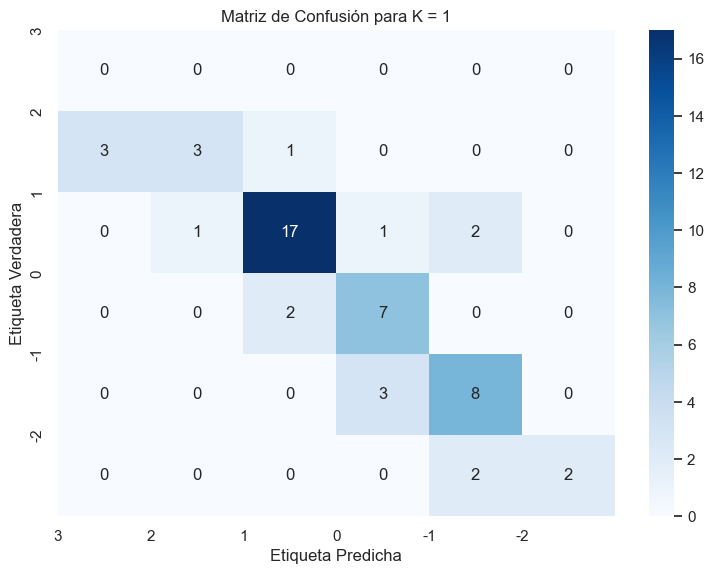



Valor de k = 3:
Precisión: 0.6538
Kappa: 0.5389
Recall medio: 0.4738
Precisión de validación cruzada: 0.6409
Clase       Recall
--------  --------
Clase 3     0
Clase 2     0.2857
Clase 1     0.7619
Clase 0     1
Clase -1    0.5455
Clase -2    0.25


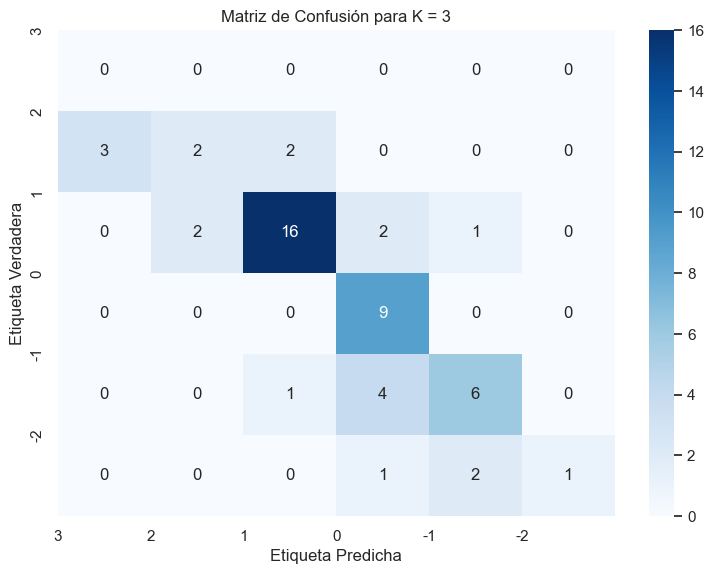



Valor de k = 5:
Precisión: 0.6731
Kappa: 0.5467
Recall medio: 0.6221
Precisión de validación cruzada: 0.5948
Clase       Recall
--------  --------
Clase 3     0.5714
Clase 2     0.8571
Clase 1     1
Clase 0     0.1818
Clase -1    0.5


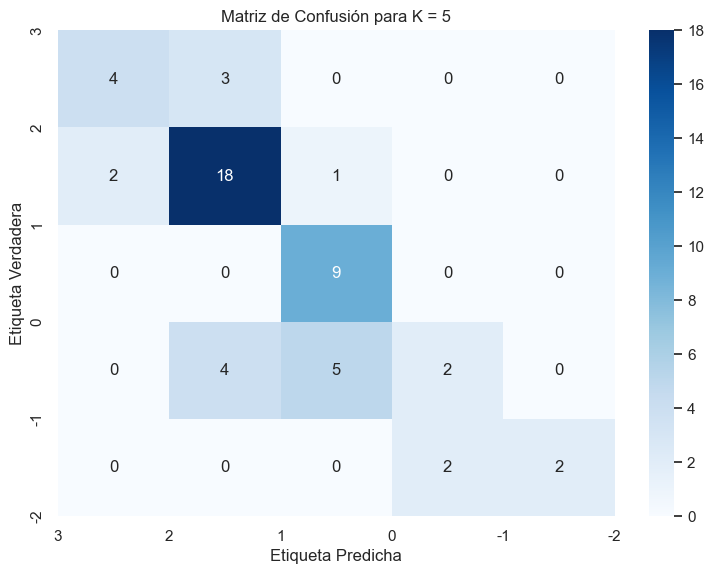



Valor de k = 7:
Precisión: 0.6538
Kappa: 0.5306
Recall medio: 0.6212
Precisión de validación cruzada: 0.5168
Clase       Recall
--------  --------
Clase 3     0.5714
Clase 2     0.7619
Clase 1     1
Clase 0     0.2727
Clase -1    0.5


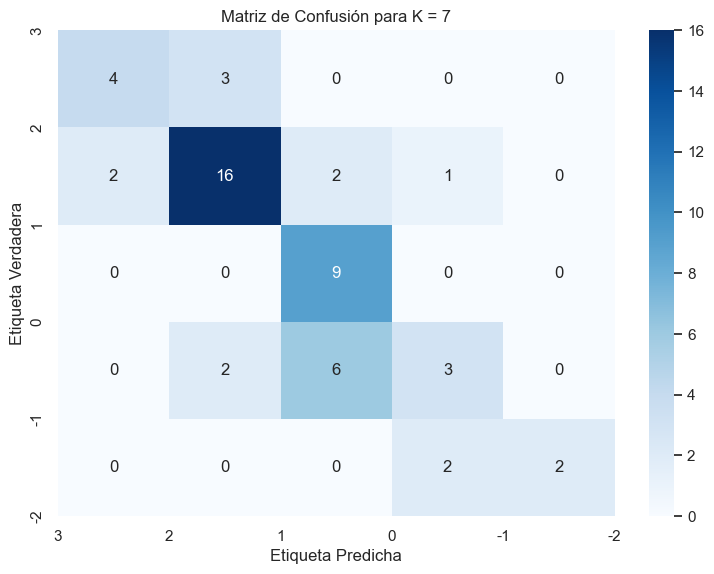

In [329]:
import warnings
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from tabulate import tabulate

warnings.filterwarnings("ignore", message="The least populated class in y has only")

# División en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)

# Imputación de los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)  # Imputar NaN en el conjunto de entrenamiento
x_test = imputer.transform(x_test)  # Imputar NaN en el conjunto de prueba

# Lista de valores de k a probar
k_values = [1, 3, 5, 7]

# Diccionario para almacenar las métricas por valor de k
metrics_by_k = {}

# Iterar sobre diferentes valores de k
for k in k_values:
    # Construir el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador KNN
    knn.fit(x_train, y_train)

    # Validación cruzada
    cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
    cv_accuracy = cv_scores.mean()

    # Predicción en el conjunto de prueba
    y_pred = knn.predict(x_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average=None)

    # Almacenar métricas en el diccionario
    metrics_by_k[k] = {'accuracy': accuracy, 'kappa': kappa, 'confusion_matrix': conf_matrix, 'recall': recall, 'cv_accuracy': cv_accuracy}

# Etiquetas de symboling para la matriz de confusión (debes definir "dependent" en tu código)
symboling_labels = sorted(list(set(dependent)), key=lambda x: int(x), reverse=True)

# Iterar sobre los resultados
for k, metrics in metrics_by_k.items():
    print(f"Valor de k = {k}:")
    print(f"Precisión: {metrics['accuracy']:.4f}")
    print(f"Kappa: {metrics['kappa']:.4f}")
    print(f"Recall medio: {np.mean(metrics['recall']):.4f}")
    print(f"Precisión de validación cruzada: {metrics['cv_accuracy']:.4f}")

    # Tabla de métricas
    table = [
        ["Clase", "Recall"],
        *[[f"Clase {label}", f"{recall:.4f}"] for label, recall in zip(symboling_labels, metrics['recall'])]
    ]
    print(tabulate(table, headers="firstrow"))

    # Matriz de confusión con colores
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, cmap='Blues', fmt='g')
    plt.title(f"Matriz de Confusión para K = {k}")
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.xticks(np.arange(len(symboling_labels)), symboling_labels)  # Etiquetas de las columnas (x)
    plt.yticks(np.arange(len(symboling_labels))[::-1], symboling_labels[::-1])  # Etiquetas de las filas (y)
    plt.show()
    print("\n" + "="*50 + "\n")


Teniendo estas métricas en cuenta, nos inclinamos más por un valor de k=1, ya que tiene mejor precisión (0.7115), mejor Kappa (0.6133) y mejor recall (0.5405). Teniendo en cuenta lo anterior, se decide entrenar el modelo con un valor de k =1.

In [330]:
# Construcción y entrenamiento del clasificador KNN
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred = knn.predict(x_test)

# Cálculo de la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7115384615384616


C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [331]:
# Aplanar los arrays multidimensionales
y_test_flat = y_test.ravel()
y_pred_flat = y_pred.ravel()

# Crear el DataFrame con los arrays aplanados
results = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})
print(results)

    Actual  Predicted
0        0         -1
1        3          2
2        2          2
3        0          2
4       -1          0
5        0          0
6        1          1
7        0          0
8        0          0
9       -1         -2
10       3          3
11       0          0
12       0          0
13       0          0
14       1          1
15       0          1
16       2          1
17       1          1
18       1          1
19       2          2
20       0          0
21       1          0
22       1          1
23       2          2
24       2          2
25       2          2
26       0          0
27       0          0
28       0          0
29       2          2
30       2          2
31       0          0
32       2          1
33       1          0
34       0          0
35       0          2
36       0          0
37      -1         -1
38       3          3
39       0          0
40      -1         -1
41      -1         -2
42      -1         -2
43       1          1
44       3

## K-fold cross-validation

El K-Fold Cross Validation divide el conjunto de datos en k partes iguales o "folds". En cada iteración, un fold se utiliza como conjunto de prueba y los demás como conjunto de entrenamiento. Este proceso se repite k veces, asegurando que cada fold se use como prueba una vez. Al final, los resultados de todas las iteraciones se promedian, proporcionando una estimación más precisa del rendimiento del modelo. Este método ayuda a prevenir el sobreajuste y maximiza el uso de los datos.

Utilizaremos este enfoque con la función cross_val_score de sklearn, que calcula el promedio de las métricas de validación cruzada, recibiendo como parámetros el modelo KNN, las variables dependientes e independientes, y el número de folds (cv).

In [332]:
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only")

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import warnings

# Ignorar la advertencia DataConversionWarning
#warnings.filterwarnings("ignore", category=DataConversionWarning)

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Realizar la validación cruzada con 5 folds
scores = cross_val_score(knn, x_train, y_train, cv=10)

# Precisión de la validación cruzada
cv_precision = [scores]
mean = scores.mean()


# Crear una lista de diccionarios con los resultados de cada fold
results = [{"Fold": i+1, "Precisión": score} for i, score in enumerate(scores)]

# Imprimir la tabla formateada
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))
print(f"\nPrecisión promedio: {mean}")

╒════════╤═════════════╕
│   Fold │   Precisión │
╞════════╪═════════════╡
│      1 │    0.6875   │
├────────┼─────────────┤
│      2 │    0.75     │
├────────┼─────────────┤
│      3 │    0.875    │
├────────┼─────────────┤
│      4 │    0.8      │
├────────┼─────────────┤
│      5 │    0.733333 │
├────────┼─────────────┤
│      6 │    0.866667 │
├────────┼─────────────┤
│      7 │    0.8      │
├────────┼─────────────┤
│      8 │    0.733333 │
├────────┼─────────────┤
│      9 │    0.866667 │
├────────┼─────────────┤
│     10 │    0.6      │
╘════════╧═════════════╛

Precisión promedio: 0.77125


C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vect

La precisión promedio de la validación cruzada es 0.77, lo que significa que, en promedio, el modelo k-NN con k=1 tiene una precisión del 77.12% en la predicción de las muestras del conjunto de datos. Dado que has utilizado un valor de k=1, el modelo se basa únicamente en la clase del vecino más cercano para hacer predicciones.

La precisión de la validación cruzada indica cuánto se puede confiar en este enfoque en promedio a través de diferentes divisiones de los datos en folds. En este caso, la precisión promedio sugiere que el modelo puede tener un rendimiento moderado en la clasificación de las muestras.

## F1 SCORE Y KNN

El F1 Score es una métrica de evaluación utilizada para medir el rendimiento de un modelo de clasificación, especialmente en situaciones donde hay un desequilibrio entre las clases. El valor del F1 Score varía entre 0 y 1, donde 1 indica un rendimiento perfecto. Utilizar el F1 Score ayuda a proporcionar una visión más completa del rendimiento del modelo en comparación con la precisión sola.

In [333]:
import warnings
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from tabulate import tabulate

warnings.filterwarnings("ignore", message="The least populated class in y has only")

# División en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)

# Imputación de los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)  # Imputar NaN en el conjunto de entrenamiento
x_test = imputer.transform(x_test)  # Imputar NaN en el conjunto de prueba

# Lista de valores de k a probar
k_values = [1, 3, 5, 7]

# Diccionario para almacenar las métricas por valor de k
metrics_by_k = {}

# Iterar sobre diferentes valores de k
for k in k_values:
    # Construir el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador KNN
    knn.fit(x_train, y_train)

    # Validación cruzada
    cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
    cv_accuracy = cv_scores.mean()

    # Predicción en el conjunto de prueba
    y_pred = knn.predict(x_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # F1 Score (macro promedio)
    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average=None)

    # Almacenar métricas en el diccionario
    metrics_by_k[k] = {
        'accuracy': accuracy, 
        'kappa': kappa, 
        'f1_score': f1,  # Agregar F1 Score
        'confusion_matrix': conf_matrix, 
        'recall': recall, 
        'cv_accuracy': cv_accuracy
    }

# Etiquetas de symboling para la matriz de confusión (debes definir "dependent" en tu código)
symboling_labels = sorted(list(set(dependent)), key=lambda x: int(x), reverse=True)

# Iterar sobre los resultados
for k, metrics in metrics_by_k.items():
    print(f"Valor de k = {k}:")
    print(f"Precisión: {metrics['accuracy']:.4f}")
    print(f"Kappa: {metrics['kappa']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")  # Mostrar F1 Score
    print(f"Recall medio: {np.mean(metrics['recall']):.4f}")
    print(f"Precisión de validación cruzada: {metrics['cv_accuracy']:.4f}")
    print()

    # Tabla de métricas
    table = [
        ["Clase", "Recall"],
        *[[f"Clase {label}", f"{recall:.4f}"] for label, recall in zip(symboling_labels, metrics['recall'])]
    ]
    print(tabulate(table, headers="firstrow"))
    print()

# Construcción y entrenamiento del clasificador KNN con el mejor k (en este caso, k=1)
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred = knn.predict(x_test)

# Cálculo de la precisión del modelo y F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print()

# Aplanar los arrays multidimensionales
y_test_flat = y_test.ravel()
y_pred_flat = y_pred.ravel()

# Crear el DataFrame con los arrays aplanados
results = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})
print(results)
print()




C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vect

Valor de k = 1:
Precisión: 0.7115
Kappa: 0.6133
F1 Score: 0.5728
Recall medio: 0.5405
Precisión de validación cruzada: 0.7516

Clase       Recall
--------  --------
Clase 3     0
Clase 2     0.4286
Clase 1     0.8095
Clase 0     0.7778
Clase -1    0.7273
Clase -2    0.5

Valor de k = 3:
Precisión: 0.6538
Kappa: 0.5389
F1 Score: 0.4806
Recall medio: 0.4738
Precisión de validación cruzada: 0.6409

Clase       Recall
--------  --------
Clase 3     0
Clase 2     0.2857
Clase 1     0.7619
Clase 0     1
Clase -1    0.5455
Clase -2    0.25

Valor de k = 5:
Precisión: 0.6731
Kappa: 0.5467
F1 Score: 0.6163
Recall medio: 0.6221
Precisión de validación cruzada: 0.5948

Clase       Recall
--------  --------
Clase 3     0.5714
Clase 2     0.8571
Clase 1     1
Clase 0     0.1818
Clase -1    0.5

Valor de k = 7:
Precisión: 0.6538
Kappa: 0.5306
F1 Score: 0.6178
Recall medio: 0.6212
Precisión de validación cruzada: 0.5168

Clase       Recall
--------  --------
Clase 3     0.5714
Clase 2     0.7619
Clas

C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USUARIO\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vect

Accuracy: 0.7115384615384616
F1 Score: 0.572840279786197

    Actual  Predicted
0        0         -1
1        3          2
2        2          2
3        0          2
4       -1          0
5        0          0
6        1          1
7        0          0
8        0          0
9       -1         -2
10       3          3
11       0          0
12       0          0
13       0          0
14       1          1
15       0          1
16       2          1
17       1          1
18       1          1
19       2          2
20       0          0
21       1          0
22       1          1
23       2          2
24       2          2
25       2          2
26       0          0
27       0          0
28       0          0
29       2          2
30       2          2
31       0          0
32       2          1
33       1          0
34       0          0
35       0          2
36       0          0
37      -1         -1
38       3          3
39       0          0
40      -1         -1
41      -1        

Se compararon los resultados obtenidos mediante el uso del algoritmo KNN, se compararon diferentes valores de k (1 y 3) para evaluar su impacto en las métricas de rendimiento. Cuando k=1, la precisión del modelo fue de 0.7115, con un Kappa de 0.6133 y un F1 Score de 0.5728, lo que indica un rendimiento moderado. Además, el recall medio fue de 0.5405, lo que sugiere que el modelo tiene una capacidad razonable para recuperar correctamente las etiquetas verdaderas, aunque hay variaciones en las clases individuales. Por ejemplo, la Clase 1 tiene un recall alto de 0.8095, mientras que la Clase 3 no fue identificada correctamente en ningún caso (recall de 0). El modelo con k=1 también mostró un buen rendimiento en la validación cruzada, con una precisión media de 0.7516.

El modelo con k=1 ofrece mejores resultados generales en términos de precisión, Kappa y F1 Score, lo que sugiere que la elección de un valor más pequeño de k permite capturar más detalles en la clasificación, aunque puede tener dificultades con clases menos representadas, como la Clase 3.

# REDUCCIÓN DE DIMENSIONALIDAD CON PCA

El Análisis de Componentes Principales (PCA) es un método de aprendizaje no supervisado, lo que significa que no se enfoca en prever una variable específica. En su lugar, examina las variables de un conjunto de datos para identificar patrones internos y reducir su complejidad. El objetivo de PCA es sintetizar la información contenida en las múltiples variables de origen en solo 2 o 3 componentes principales. Esta reducción facilita la creación de visualizaciones en 2D o 3D, lo cual es particularmente útil para datos con numerosas dimensiones.

Antes de implementar PCA, es crucial realizar una serie de pasos de preprocesamiento en los datos. Esto implica verificar que las variables se encuentren en el formato correcto de acuerdo con su contexto, manejar cualquier valor atípico o faltante y asegurarse de que los datos estén listos para el análisis. En este caso, la limpieza de datos ya fue completada en una fase previa. Decidimos conservar los valores atípicos, ya que en este análisis de diferentes tipos de autos, estos valores podrían representar características reales y únicas de cada tipo. Por lo tanto, el siguiente paso consiste en estandarizar las columnas que vamos a utilizar, lo cual es esencial para que todas las variables tengan una escala comparable en el proceso de PCA.

# PCA

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # Habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Seleccionar solo las columnas numéricas
df_numPCA = df.select_dtypes(include=['int64', 'float64'])

# Imputación multivariada de los valores faltantes
imputer = IterativeImputer(max_iter=10, random_state=0)
df_numPCA_imputed = pd.DataFrame(imputer.fit_transform(df_numPCA), columns=df_numPCA.columns)

# Estandarización de datos
scaler = StandardScaler()
data_std = scaler.fit_transform(df_numPCA_imputed)


In [335]:
# Análisis de PCA
pca = PCA()
pca.fit(data_std)

PCA()

In [336]:
components_df = pd.DataFrame(pca.components_, columns=df_numPCA.columns)
print(components_df)

    symboling  normalized-losses  wheel-base    length     width    height  \
0   -0.075363           0.098753    0.278997  0.320918  0.319214  0.097090   
1   -0.407632          -0.405253    0.281837  0.162122  0.081767  0.420702   
2    0.249220           0.237524   -0.051050 -0.062563  0.062819 -0.249011   
3   -0.219511          -0.076427    0.128564  0.054879  0.065887  0.062920   
4   -0.224496          -0.262871   -0.072363 -0.068724 -0.157470  0.079211   
5    0.099093           0.302579    0.172207  0.128332  0.146994  0.276834   
6    0.511154           0.156648    0.116582  0.194037 -0.061254  0.362237   
7    0.315897          -0.433362   -0.196952 -0.014225 -0.006629  0.111332   
8   -0.296061           0.477476    0.246109  0.125055 -0.013978 -0.124604   
9    0.139457           0.180983   -0.119036 -0.105126 -0.250436  0.635258   
10   0.357043          -0.280321    0.213869  0.104226  0.599852 -0.127398   
11  -0.089614           0.127643   -0.287955  0.242456  0.180810

En la matriz anterior, cada valor representa el coeficiente o carga de una variable original en un componente principal, mostrando cuánto contribuye esa variable específica a la composición de cada componente. Estos coeficientes reflejan cómo se combinan las variables originales para construir cada componente principal y ayudan a interpretar la influencia de cada variable en la estructura general de los datos transformados.

In [337]:
explained_variance = np.array(pca.explained_variance_)

# Creamos un DataFrame para visualizar los resultados
varianza_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza Explicada': explained_variance
})

print(varianza_df)

   Componente Principal  Varianza Explicada
0                   PC1            7.732995
1                   PC2            3.109795
2                   PC3            1.428211
3                   PC4            0.953236
4                   PC5            0.787568
5                   PC6            0.687530
6                   PC7            0.548004
7                   PC8            0.451831
8                   PC9            0.356011
9                  PC10            0.336007
10                 PC11            0.243510
11                 PC12            0.123913
12                 PC13            0.108315
13                 PC14            0.078837
14                 PC15            0.068419
15                 PC16            0.050680
16                 PC17            0.018471


La matriz presenta los valores propios asociados a cada componente principal, lo que permite ver la cantidad de varianza de los datos originales que cada componente es capaz de representar. El primer componente principal, por ejemplo, captura una varianza de 7.732, lo que indica que este componente retiene la mayor proporción de información del conjunto de datos, convirtiéndolo en el componente más significativo en términos de representación de los datos originales.

In [338]:
var_exp_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con el identificador del componente y la varianza explicada
components_var_exp = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(var_exp_ratio))],
    'Explained Variance Ratio': var_exp_ratio
})

print(components_var_exp)

   Principal Component  Explained Variance Ratio
0                  PC1                  0.452663
1                  PC2                  0.182037
2                  PC3                  0.083603
3                  PC4                  0.055799
4                  PC5                  0.046102
5                  PC6                  0.040246
6                  PC7                  0.032078
7                  PC8                  0.026449
8                  PC9                  0.020840
9                 PC10                  0.019669
10                PC11                  0.014254
11                PC12                  0.007253
12                PC13                  0.006340
13                PC14                  0.004615
14                PC15                  0.004005
15                PC16                  0.002967
16                PC17                  0.001081


Esta matriz muestra qué proporción de la varianza total en los datos es explicada por cada componente principal, dándonos una perspectiva clara sobre cuánta información aporta cada uno de ellos. Estos valores están normalizados, de modo que su suma siempre es igual a 1, lo que permite comprender rápidamente el peso relativo de cada componente en términos de variabilidad. A continuación se describen los componentes más relevantes:

### PC1:
El primer componente principal es el más influyente, explicando aproximadamente el 45,26% de la variabilidad total, casi la mitad de toda la información presente en los datos.

### PC2:
El segundo componente principal contribuye con un 18,20% adicional. Su aporte es menor que el de PC1; sin embargo continúa siendo importante para el análisis.

### PC3:
El tercer componente principal explica un 8,36% de variabilidad.

### PC4:
El cuarto componente principal añade un 5,57% de la variabilidad.

### PC5:
El quinto componente principal agrega un 4,61% de la variabilidad.

## Importante:
Si se retiene los dos primeros componentes (PC1 y PC2), se capturaría aproximadamente el 63,46% de la varianza total. Ahora, si sumamos los componentes PC3 y PC4, se cubre el 82% de la varianza total, lo cual es una buena proporción de la información para muchas aplicaciones de análisis.

## Resumen de los Datos

A continuación, se presenta una tabla donde se resumen los datos expuestos anteriormente:

In [339]:
# Vector de varianza explicada por cada componente principal
var_exp_ratio = [0.452663,0.182037,0.083603,0.055799,0.046102,0.040246,0.032078,0.026449,0.020840,0.019669,0.014254,0.007253,0.006340,0.004615,0.004005,0.002967,0.001081]

# Cálculo de la varianza explicada acumulada
cum_var_exp = np.cumsum(var_exp_ratio)

# Vector de varianza explicada
explained_variance = np.array(pca.explained_variance_)

# Crear identificadores de componentes principales
componentes = [f'PC{i+1}' for i in range(len(var_exp_ratio))]

# Crear DataFrame
df_var_exp = pd.DataFrame({
    'Principal Component': componentes,
    'Varianza Explicada': explained_variance,
    'Explained Variance Ratio': var_exp_ratio,
    'Cumulative Variance Ratio': cum_var_exp
})

# Mostrar los resultados
print(df_var_exp)

   Principal Component  Varianza Explicada  Explained Variance Ratio  \
0                  PC1            7.732995                  0.452663   
1                  PC2            3.109795                  0.182037   
2                  PC3            1.428211                  0.083603   
3                  PC4            0.953236                  0.055799   
4                  PC5            0.787568                  0.046102   
5                  PC6            0.687530                  0.040246   
6                  PC7            0.548004                  0.032078   
7                  PC8            0.451831                  0.026449   
8                  PC9            0.356011                  0.020840   
9                 PC10            0.336007                  0.019669   
10                PC11            0.243510                  0.014254   
11                PC12            0.123913                  0.007253   
12                PC13            0.108315                  0.00

## VISUALIZACIÓN Y ENTENDIMIENTO DE LOS COMPONENTES

Seguidamente, se grafica la información que proporciona cada componente:

### GRÁFICA EN DIMENSIÓN ORIGINAL

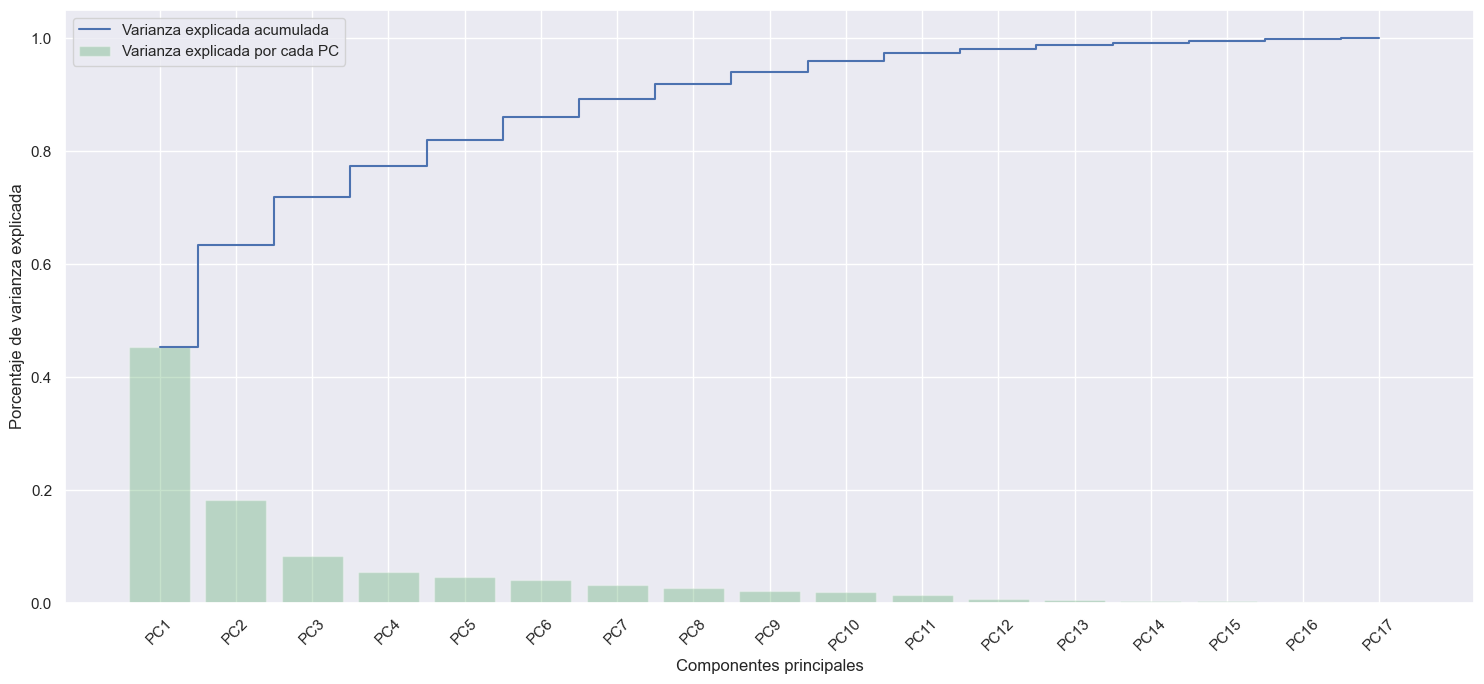

In [340]:
# Vector de varianza explicada por cada componente principal
var_exp_ratio = [0.452663,0.182037,0.083603,0.055799,0.046102,0.040246,0.032078,0.026449,0.020840,0.019669,0.014254,0.007253,0.006340,0.004615,0.004005,0.002967,0.001081]

# Cálculo de la varianza explicada acumulada
cum_var_exp = np.cumsum(var_exp_ratio)

# Identificadores de componentes principales
componentes = [f'PC{i+1}' for i in range(len(var_exp_ratio))]

# Creación del Gráfico
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp_ratio)), var_exp_ratio, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color='g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='Varianza explicada acumulada')

# Establecer etiquetas personalizadas en el eje x
plt.xticks(range(len(componentes)), componentes, rotation=45)

# Etiquetas de los ejes y el título
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')

# Mostrar la leyenda y el gráfico
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Teniendo en cuenta la anterior gráfica observamos el comportamiento y las proporciones explicadas anteriormente. En efecto, se decide escoger los cinco primeros componentes principales, preservando así el 82% de la información.

### GRÁFICA EN DIMENSIONES ESPACIALES

A partir del método Transform del objeto PCA, es posible pasar de la representación en las dimensiones originales a la de las dimensiones en el espacio de los componentes principales encontrados. En el siguiente fragmento de código se puede observar que se escogen los primeros cinco componente para graficar:

In [341]:
dataPca = pca.transform(data_std)
dataPca = dataPca[:,0:5]
dataPca[0:5]

array([[-0.29124938, -3.19617888,  0.52817985, -2.56438728,  1.25800314],
       [-0.16323678, -3.26054969,  0.58668833, -2.60139937,  1.25334021],
       [ 0.75829251, -1.57102517,  1.12167597,  1.0042583 ,  1.87805595],
       [-0.20514316, -0.8882205 ,  0.16537603,  0.73169611, -0.90250032],
       [ 1.20246538, -1.54131111, -0.35247108,  0.93024584, -0.92782165]])

In [342]:
import matplotlib.pyplot as plt

def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:, index1]
    ys = data[:, index2]
    n = loadings.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i, index1], loadings[i, index2], color='r', alpha=0.5)
        if labels is None:
            plt.text(loadings[i, index1] * 1.15, loadings[i, index2] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i, index1] * 1.15, loadings[i, index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(index1 + 1))
    plt.ylabel("PC{}".format(index2 + 1))
    plt.grid()
    plt.show()

# Asumiendo que dataPca es el resultado de PCA.transform() y pca.components_ son las cargas

labls = df_numPCA.columns.to_list()

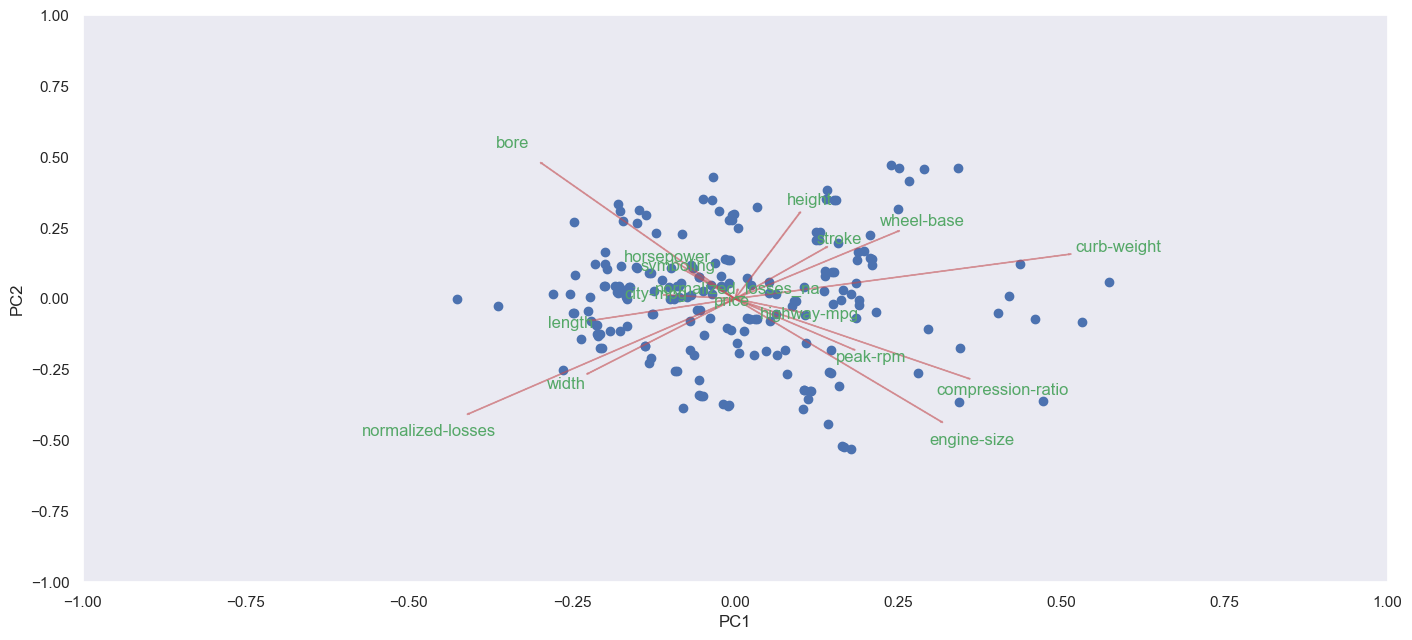

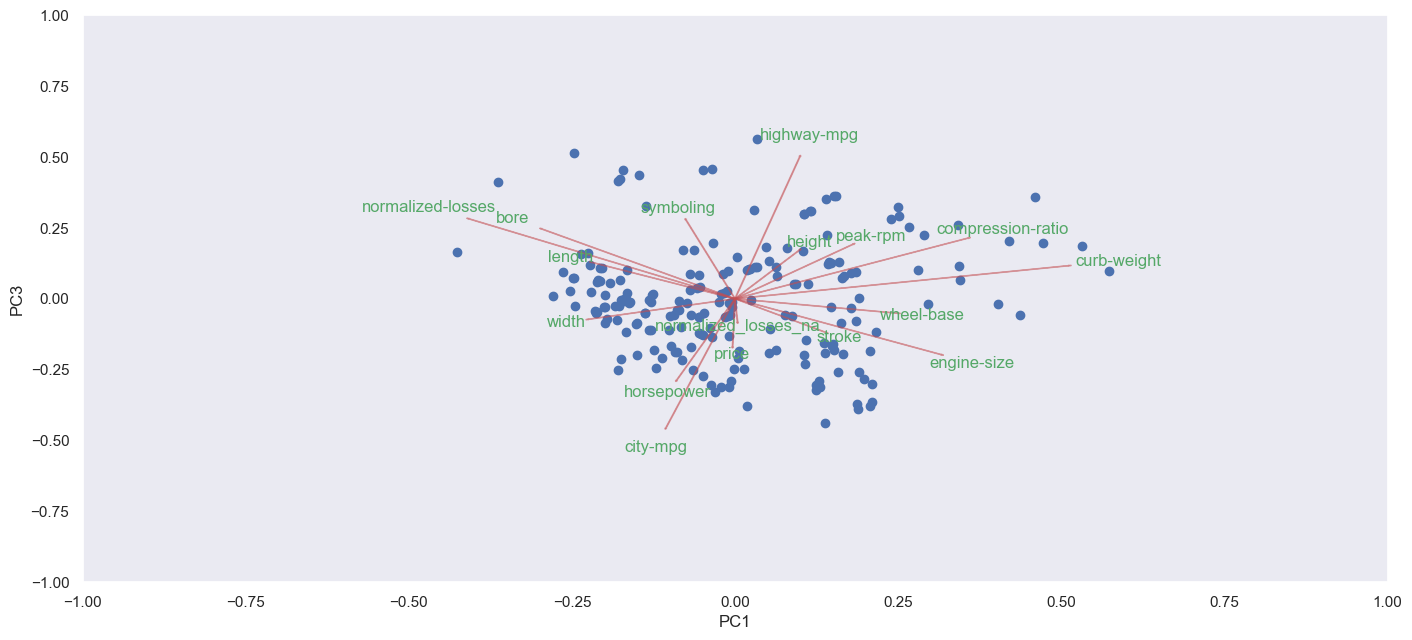

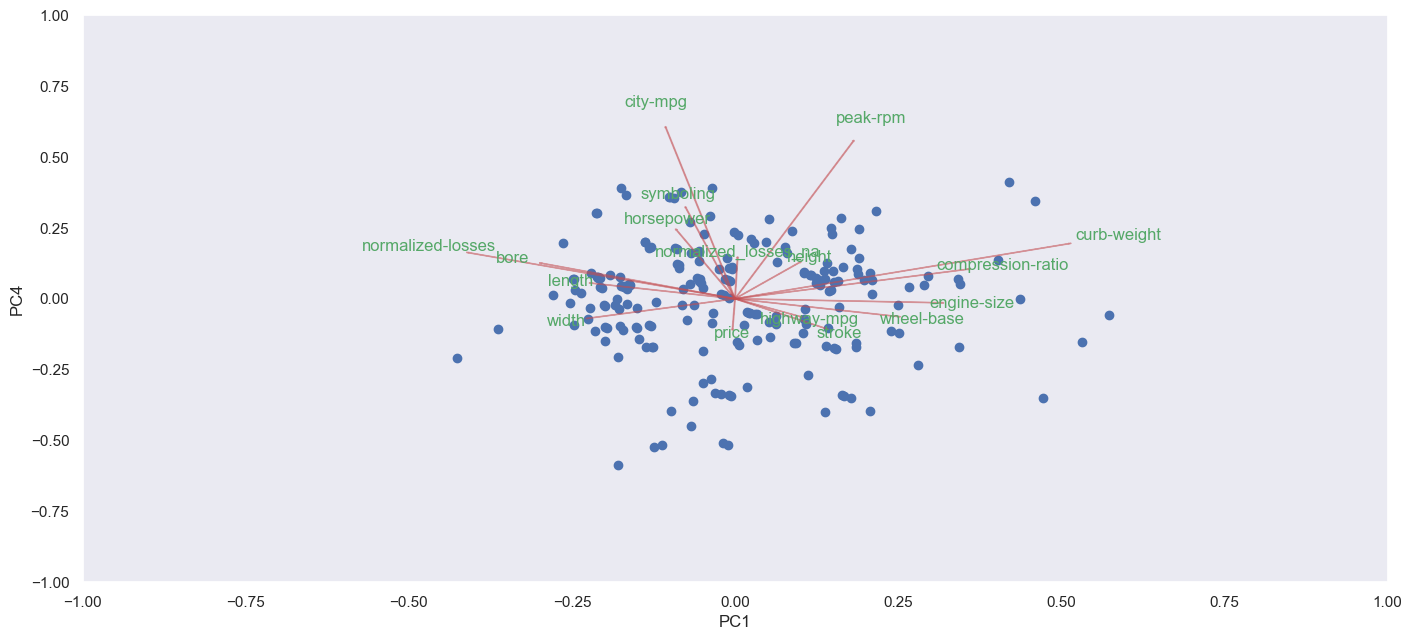

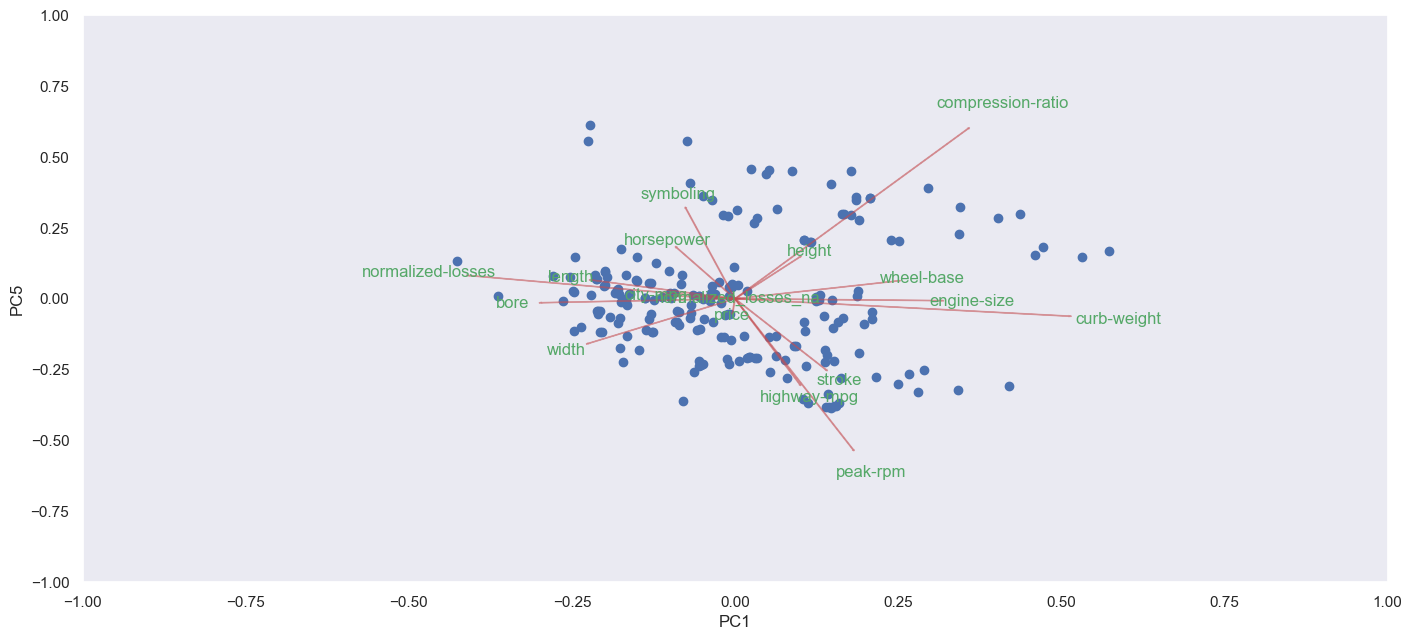

In [343]:
# Generando biplots para las combinaciones de componentes

#PC1 vs PC2
biplot(dataPca, pca.components_, 0, 1, labls)

#PC1 vs PC3
biplot(dataPca, pca.components_, 0, 2, labls)

#PC1 vs PC4
biplot(dataPca, pca.components_, 0, 3, labls)

#PC1 vs PC5
biplot(dataPca, pca.components_, 0, 4, labls)

## INTERPRETACIÓN DE LOS GRÁFICOS DE LOS COMPONENTES PRINCIPALES

### COMPONENTE PRINCIPAL UNO (PC1):
PC1 está influenciado principalmente por las variables curb-weight, engine-size, y compression-ratio. Estas variables están alineadas positivamente con PC1, lo que indica que contribuyen en la misma dirección y tienen una fuerte influencia en este componente. También se observa que city-mpg y highway-mpg están en la dirección opuesta a curb-weight y engine-size, lo que indica una correlación negativa con PC. Para resaltar, este componente captura características relacionadas con el tamaño y potencia del motor.

### COMPONENTE PRINCIPAL DOS (PC2):
PC2 está influenciado principalmente por las variables height, bore, y wheel-base. Estas variables tienen una correlación positiva con PC2, lo que indica que incrementan conjuntamente con este componente. En contraste, variables como normalized-losses y width están en una dirección opuesta, sugiriendo una correlación negativa con PC2. 

PC2 parece capturar variaciones en dimensiones estructurales del automóvil, como la altura y la distancia entre ejes. Esto indica que los vehículos con una mayor altura y distancia entre ejes tienden a posicionarse más alto en el gráfico en dirección de PC2.

### COMPONENTE PRINCIPAL TRES (PC3):
PC3 está influenciado principalmente por las variables "highway-mpg" (eficiencia de combustible en carretera) y "height" (altura del vehículo). PC3 parece capturar variaciones en la eficiencia de combustible en carretera y altura del vehículo. Este componente podría diferenciar los automóviles en función de su rendimiento en combustible y diseño estructural (altura).

### COMPONENTE PRINCIPAL CUATRO (PC4):
PC4 está influenciado principalmente por las variables "city-mpg" (eficiencia de combustible en ciudad) y "peak-rpm" (revoluciones por minuto máximas del motor). PC4 parece capturar variaciones en la eficiencia de combustible en ciudad y el rendimiento del motor. Este componente puede ayudar a diferenciar vehículos en función de su consumo de combustible en entornos urbanos y su capacidad de rendimiento a altas revoluciones.

### COMPONENTE PRINCIPAL CINCO (PC5):
PC5 está influenciado principalmente por las variables "Compression-ratio" (revoluciones por minuto máximas del motor) y "Horsepower". PC5 parece capturar la potencia y el nivel de riesgo asociado a vehículos con mayor rendimiento.
